# Helper: Einlesen von aktuellen Ergebnissen

In [74]:
import os
import json

from datetime import datetime

def cached(func):
    cache = {}
    
    def cached_func(arg):
        if arg not in cache:
            cache[arg] = func(arg)
            
        return cache[arg]
    
    return cached_func

@cached
def read_latest_result(keyword):
    keyword_dir = get_keyword_dir(keyword)
    
    if not os.path.isdir(keyword_dir):
        return None
    
    to_datetime = lambda x: datetime.fromisoformat(os.path.splitext(x)[0])
    
    file_name = max(os.listdir(keyword_dir),
                    key=to_datetime)
    
    with open(os.path.join(keyword_dir, file_name), "r") as fd:
        return json.load(fd)

def get_keyword_dir(keyword):
    root_dir = os.path.dirname(os.getcwd())
    return os.path.join(root_dir, "results", keyword[0], keyword)

read_latest_result("winkel")[:3]

[{'name': 'Winkel – Wikipedia  de.wikipedia.org › wiki › Winkel',
  'link': 'https://de.wikipedia.org/wiki/Winkel',
  'description': 'Winkel – Wikipedia',
  'googleLink': 'http://www.google.com/url?q=https://de.wikipedia.org/wiki/Winkel&sa=U&ved=2ahUKEwii0-qq2eHuAhWBnFkKHSffAwkQFjADegQIBxAB&usg=AOvVaw1a_79tuZln9g4SI5lkKP8-',
  'page': 0,
  'index': 0},
 {'name': 'Winkel (Werkzeug) – Wikipedia  de.wikipedia.org › wiki › Winkel_(Werkzeug)',
  'link': 'https://de.wikipedia.org/wiki/Winkel_(Werkzeug)',
  'description': 'Winkel (Werkzeug) – Wikipedia',
  'googleLink': 'http://www.google.com/url?q=https://de.wikipedia.org/wiki/Winkel_(Werkzeug)&sa=U&ved=2ahUKEwii0-qq2eHuAhWBnFkKHSffAwkQFjAEegQICBAB&usg=AOvVaw0Oba9lwiRxgvPn6heTtH43',
  'page': 0,
  'index': 1},
 {'name': 'Grundlagen zu Winkeln - bettermarks  de.bettermarks.com › ... › Winkel, Grundkonstruktionen und Symmetrie',
  'link': 'https://de.bettermarks.com/mathe/grundlagen-zu-winkeln/',
  'description': 'Grundlagen zu Winkeln - bette

# Helper: Bestimmung der Hauptdomain

In [75]:
from urllib.parse import urlparse

def get_domain(url):
    parts = urlparse(url).hostname.split(".")
    domain = ".".join(parts[-2:])
    
    if domain == "wikibooks.org" and ("Freaks" in url or "Serlo" in url):
        return "serlo.org"
    
    return domain

print(get_domain("https://de.wikipedia.org/wiki/Winkel"))
print(get_domain("https://de.wikibooks.org/wiki/Mathe_f%C3%BCr_Nicht-Freaks:_Mitmachen_f%C3%BCr_(Nicht-)Freaks"))
print(get_domain("https://de.wikibooks.org/wiki/Serlo:_EN:_Absolute_value_and_conjugation"))

wikipedia.org
serlo.org
serlo.org


# Helper: Finde die am Besten laufenden Domains in in einer Liste von Keywords

In [76]:
from collections import defaultdict

snd = lambda x: x[1]

def get_best_domains(keywords, blacklist=[], no_domains=9):
    domains = defaultdict(int)
    
    for keyword in keywords:
        for entry in read_latest_result(keyword):
            points = max(0, 50 - entry["index"] - entry["page"] * 10)
            domains[get_domain(entry["link"])] += points
    
    result = [x for x in domains.items() if x[0] not in blacklist]
    result = sorted(result, key=snd, reverse=True)[:no_domains]
    
    return [ r[0] for r in result ]

get_best_domains(["winkel", "analysis", "betrag", "sekante"])

['wikipedia.org',
 'serlo.org',
 'youtube.com',
 'wiktionary.org',
 'mathebibel.de',
 'learnattack.de',
 'gut-erklaert.de',
 'dwds.de',
 'frustfrei-lernen.de']

# Auswertung

## Auswertung aller Suchbegriffe

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 9 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* wikipedia.org
* youtube.com
* springer.com
* lernhelfer.de
* spektrum.de
* mathebibel.de
* mathelounge.de
* studyflix.de
* wiktionary.org

### Tabelle

,serlo.org,wikipedia.org,youtube.com,springer.com,lernhelfer.de,spektrum.de,mathebibel.de,mathelounge.de,studyflix.de,wiktionary.org
keyword,,,,,,,,,,
molekülmasse,13.0,1.0,3.0,20.0,11.0,10.0,NaN,NaN,16.0,NaN
bruchgleichung,8.0,6.0,1.0,NaN,19.0,NaN,4.0,NaN,43.0,NaN
geometrische summenformel,24.0,2.0,4.0,NaN,NaN,NaN,NaN,20.0,3.0,NaN
substitution,2.0,3.0,1.0,NaN,NaN,46.0,9.0,NaN,50.0,NaN
halogene,NaN,2.0,3.0,10.0,1.0,13.0,NaN,NaN,4.0,NaN


### Deskriptive Auswertung

,serlo.org,wikipedia.org,youtube.com,springer.com,lernhelfer.de,spektrum.de,mathebibel.de,mathelounge.de,studyflix.de,wiktionary.org
count,529.000000,832.000000,712.000000,436.000000,350.000000,345.000000,229.000000,308.000000,240.000000,286.000000
mean,11.353497,3.762019,7.407303,24.114679,17.931429,21.634783,8.650655,24.094156,12.595833,20.653846
std,11.422242,6.224334,7.531078,12.299917,11.959381,13.193548,9.786325,12.512700,12.447681,13.095698
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,3.000000,14.000000,9.000000,10.000000,3.000000,14.000000,4.000000,9.000000
50%,7.000000,1.000000,5.000000,23.000000,16.000000,19.000000,5.000000,22.000000,7.000000,18.000000
75%,15.000000,4.000000,9.000000,33.000000,24.000000,31.000000,10.000000,34.000000,17.250000,31.000000
max,50.000000,49.000000,48.000000,50.000000,50.000000,50.000000,49.000000,50.000000,50.000000,50.000000


### Historgramme

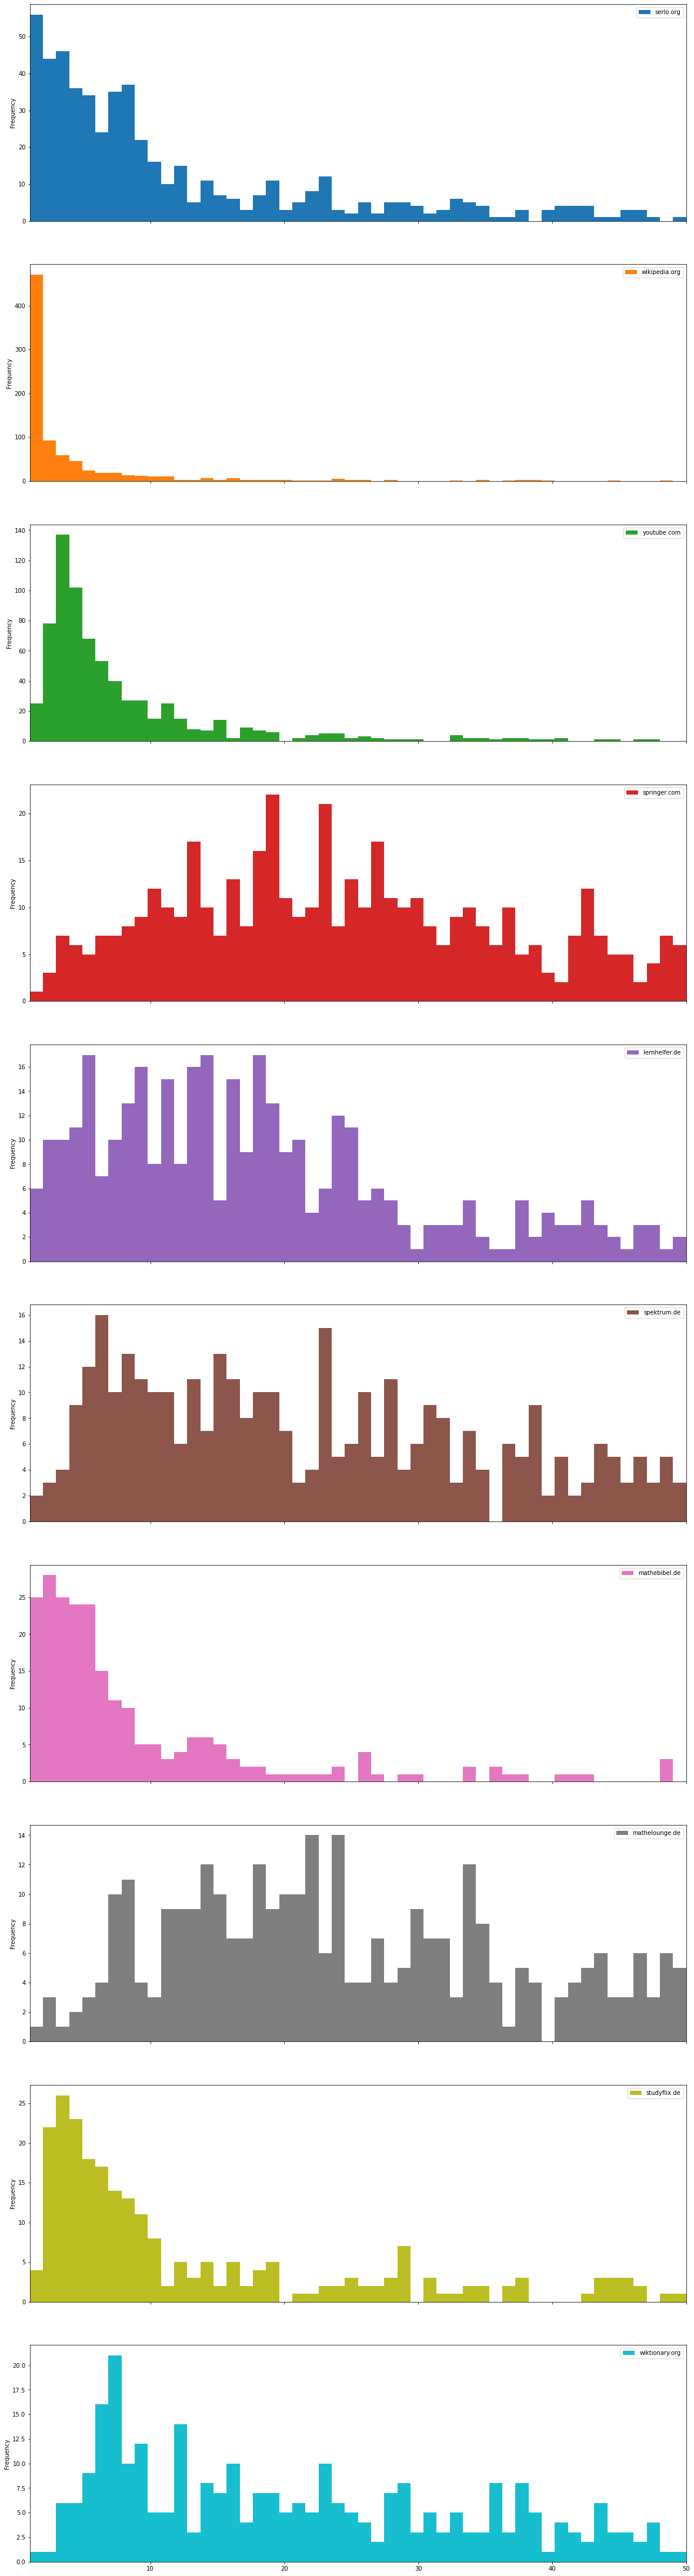

In [77]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

with open("../keywords.json", "r") as fd:
    all_keyword_entries = json.load(fd)

def analyse(query={}, analysed_domains=["serlo.org"],
            compare_domains=None, blacklist=[], no_domains=6):
    def is_in_query(entry):
        return all((entry[key] == value for key, value in query.items()))
    
    keyword_entries = [k for k in all_keyword_entries if is_in_query(k)]
    keywords = [entry["keyword"] for entry in keyword_entries]
    keywords = list(set(keywords))
    
    compare_domains_orig = compare_domains
    
    if compare_domains == None:    
        compare_domains = get_best_domains(keywords, blacklist=analysed_domains + blacklist,
                                           no_domains = no_domains)
    
    domains = analysed_domains + compare_domains
    
    read_ranking = lambda keyword: [keyword] + [get_best_ranking(keyword, domain) for domain in domains]
        
    df = pd.DataFrame(map(read_ranking, keywords), columns=["keyword"] + domains)
    df.set_index("keyword", inplace=True)
    
    if len(query) > 0:
        query_title = "(" + ", ".join(("%s: %s" % x for x in query.items())) + ")"
    else:
        query_title = "aller Suchbegriffe"
    
    display(Markdown("## Auswertung " + query_title))
    
    if "scope" not in query:
        display(Markdown("Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben."))
    
    display(Markdown("Auswertung für folgende Webseiten:"))
    display_list(analysed_domains)
    
    if compare_domains_orig:
        display(Markdown("Zum Vergleich werden auch die Ergebnisse der folgenden Webseiten angezeigt:"))
        display_list(domains)
    elif no_domains > 0:
        display(Markdown("Zum Vergleich werden die besten %s weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:" % no_domains))
        display_list(compare_domains)
        
        if blacklist:
            display(Markdown("Bei der Analyse der weiteren Webseiten wurde ausgeschlossen"))
            display_list(blacklist)
    
    display(Markdown("### Tabelle"))
    display(df.head())
    
    display(Markdown("### Deskriptive Auswertung"))
    display(df.describe())
    
    display(Markdown("### Historgramme"))
    maxRank = int(df.max().max())
    df.plot.hist(figsize=(20, 8 * len(df.columns)), xlim=(1,maxRank),
                 bins=maxRank, subplots=True)
    plt.show()

def display_list(entries):
    display(Markdown("\n".join(("* " + e for e in entries))))

def get_best_ranking(keyword, domain):
    for index, entry in enumerate(read_latest_result(keyword)):
        if urlparse(entry["link"]).hostname.endswith(domain):
            return entry["page"]*10 + entry["index"] + 1

    return None
    
    
analyse(no_domains=9)

# Auswertung nach Fach

## Auswertung (subject: Nachhaltigkeit)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* mein-schoener-garten.de
* amazon.de
* pinterest.de
* bayern.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,mein-schoener-garten.de,amazon.de,pinterest.de,bayern.de
keyword,,,,,,
düngung,33.0,11.0,14.0,NaN,NaN,1.0
sortenvielfalt,3.0,NaN,NaN,35.0,13.0,24.0
fruchtfolge,29.0,25.0,1.0,40.0,NaN,9.0
plastikalternativen,14.0,NaN,NaN,NaN,18.0,NaN
zonierung,9.0,NaN,NaN,NaN,NaN,23.0


### Deskriptive Auswertung

,serlo.org,youtube.com,mein-schoener-garten.de,amazon.de,pinterest.de,bayern.de
count,32.000000,29.000000,25.00000,29.000000,22.000000,18.000000
mean,15.593750,13.034483,10.20000,22.344828,22.590909,23.944444
std,12.651302,8.457806,11.92686,16.091870,11.095512,14.850123
min,1.000000,4.000000,1.00000,1.000000,2.000000,1.000000
25%,3.000000,7.000000,3.00000,8.000000,15.250000,10.250000
50%,13.500000,10.000000,4.00000,17.000000,23.000000,23.500000
75%,23.000000,19.000000,12.00000,35.000000,31.000000,36.250000
max,47.000000,34.000000,39.00000,49.000000,44.000000,49.000000


### Historgramme

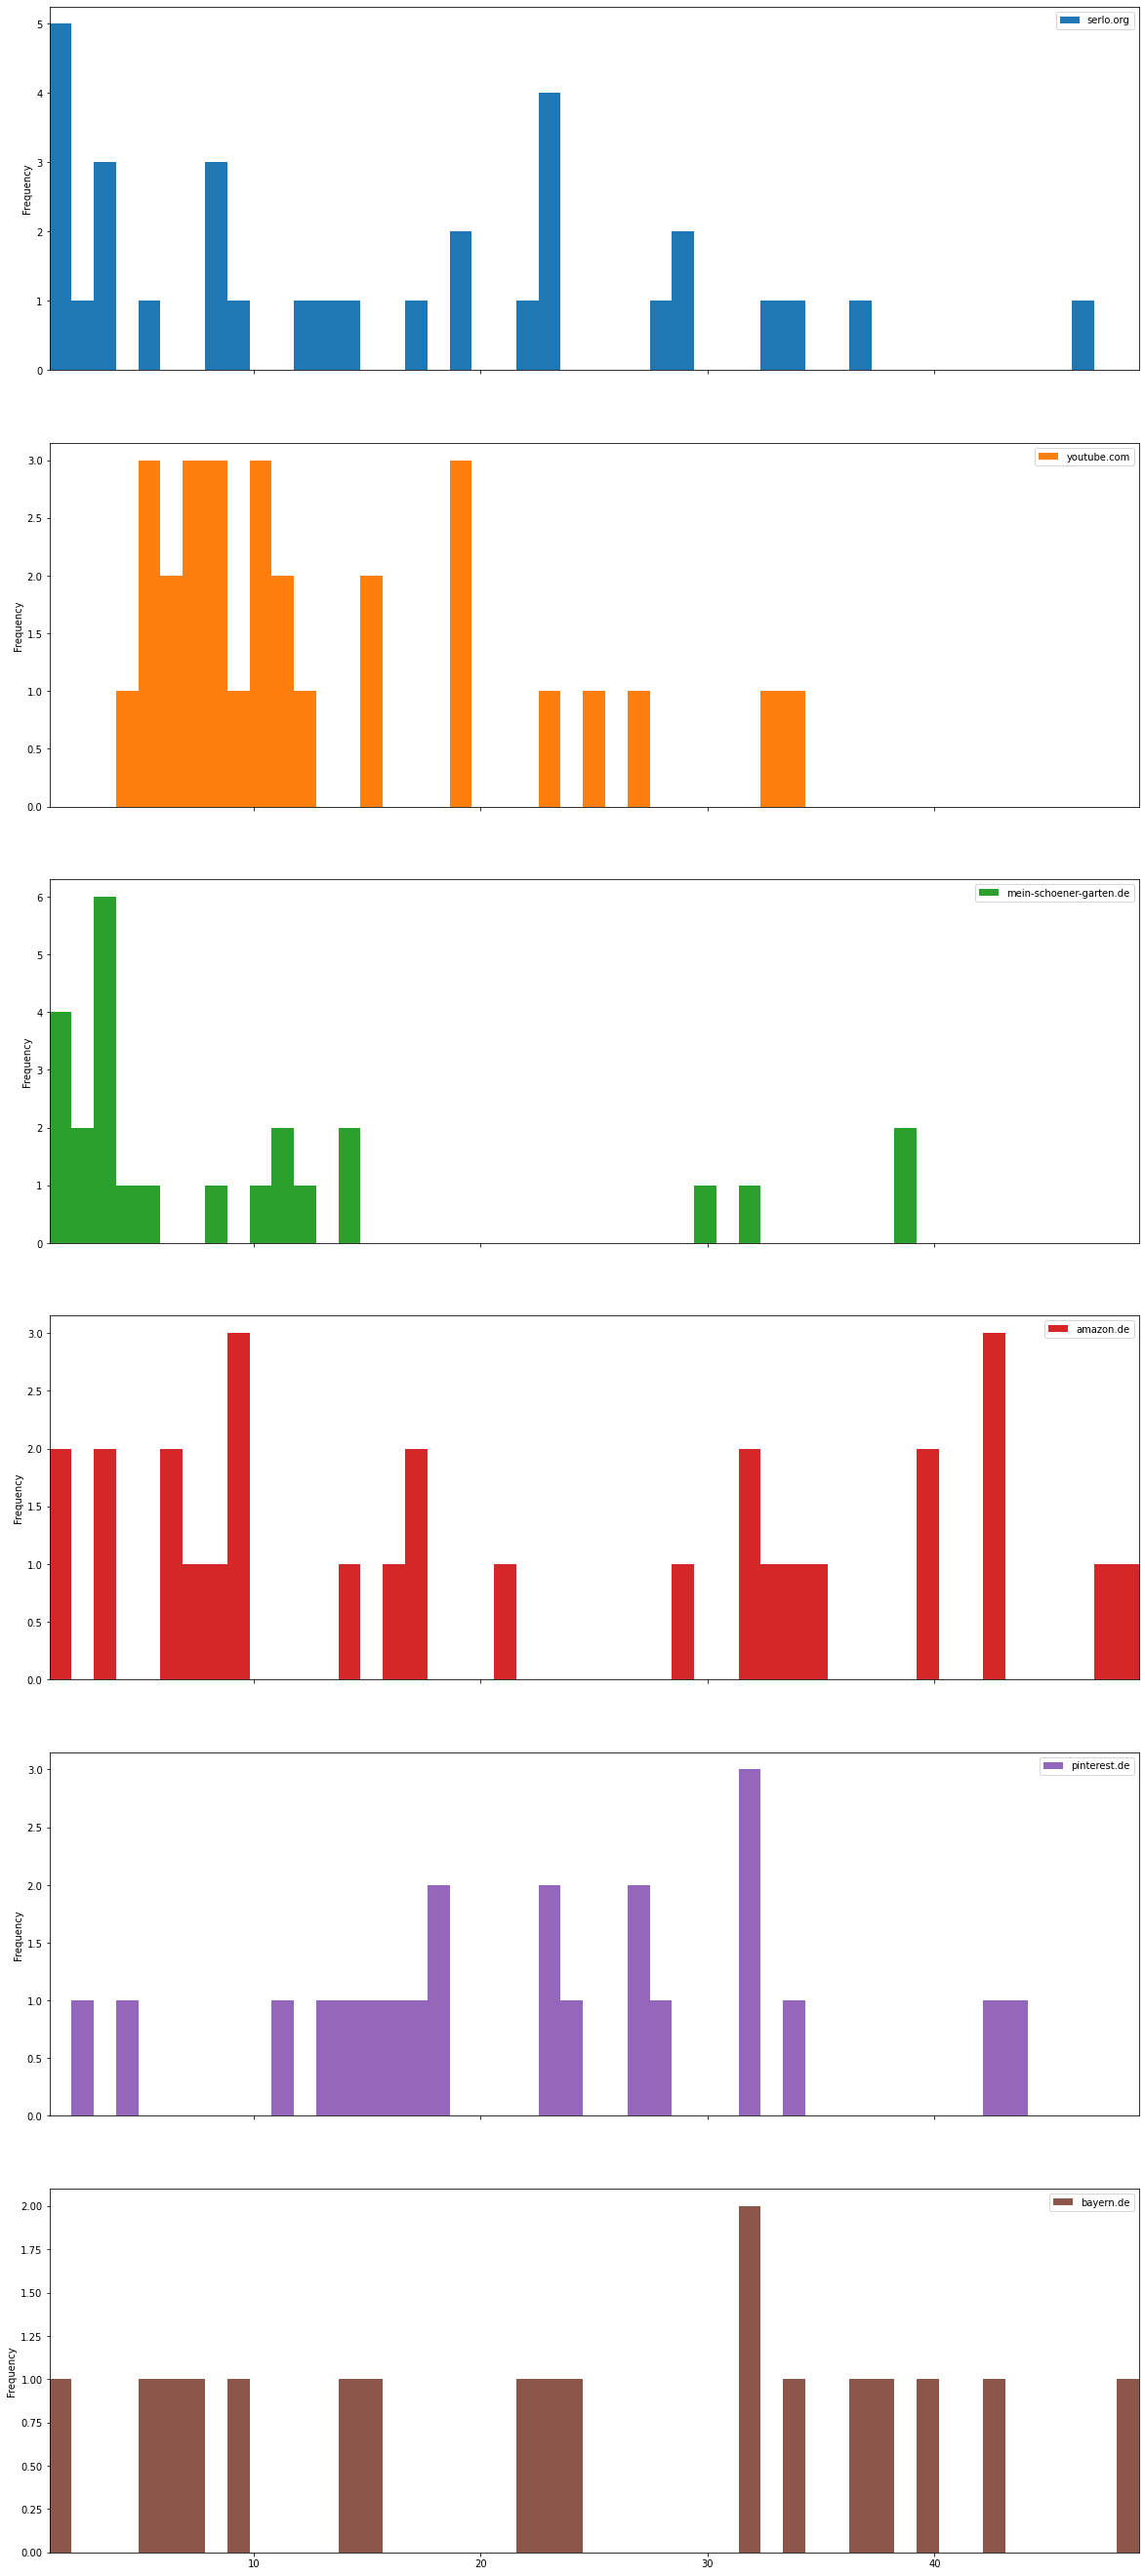

## Auswertung (subject: Wirtschaft)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* gabler.de
* billomat.com
* bundesfinanzministerium.de
* debitoor.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,gabler.de,billomat.com,bundesfinanzministerium.de,debitoor.de
keyword,,,,,,
einkommensteuer,NaN,9.0,34.0,16.0,4.0,2.0
lohnsteuer,NaN,22.0,21.0,8.0,7.0,43.0
bewerbungsgespräch,NaN,5.0,NaN,NaN,NaN,NaN
cluster,NaN,6.0,3.0,NaN,NaN,NaN
betrieb,31.0,15.0,2.0,NaN,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,gabler.de,billomat.com,bundesfinanzministerium.de,debitoor.de
count,2.000000,14.000000,15.00000,9.000000,7.000000,9.000000
mean,36.500000,13.642857,17.20000,11.333333,6.714286,7.888889
std,7.778175,7.781706,14.73189,10.099505,4.715728,13.232955
min,31.000000,5.000000,2.00000,3.000000,1.000000,2.000000
25%,33.750000,8.250000,4.00000,5.000000,3.500000,2.000000
50%,36.500000,11.500000,14.00000,9.000000,7.000000,4.000000
75%,39.250000,17.250000,29.00000,12.000000,8.500000,5.000000
max,42.000000,30.000000,49.00000,36.000000,15.000000,43.000000


### Historgramme

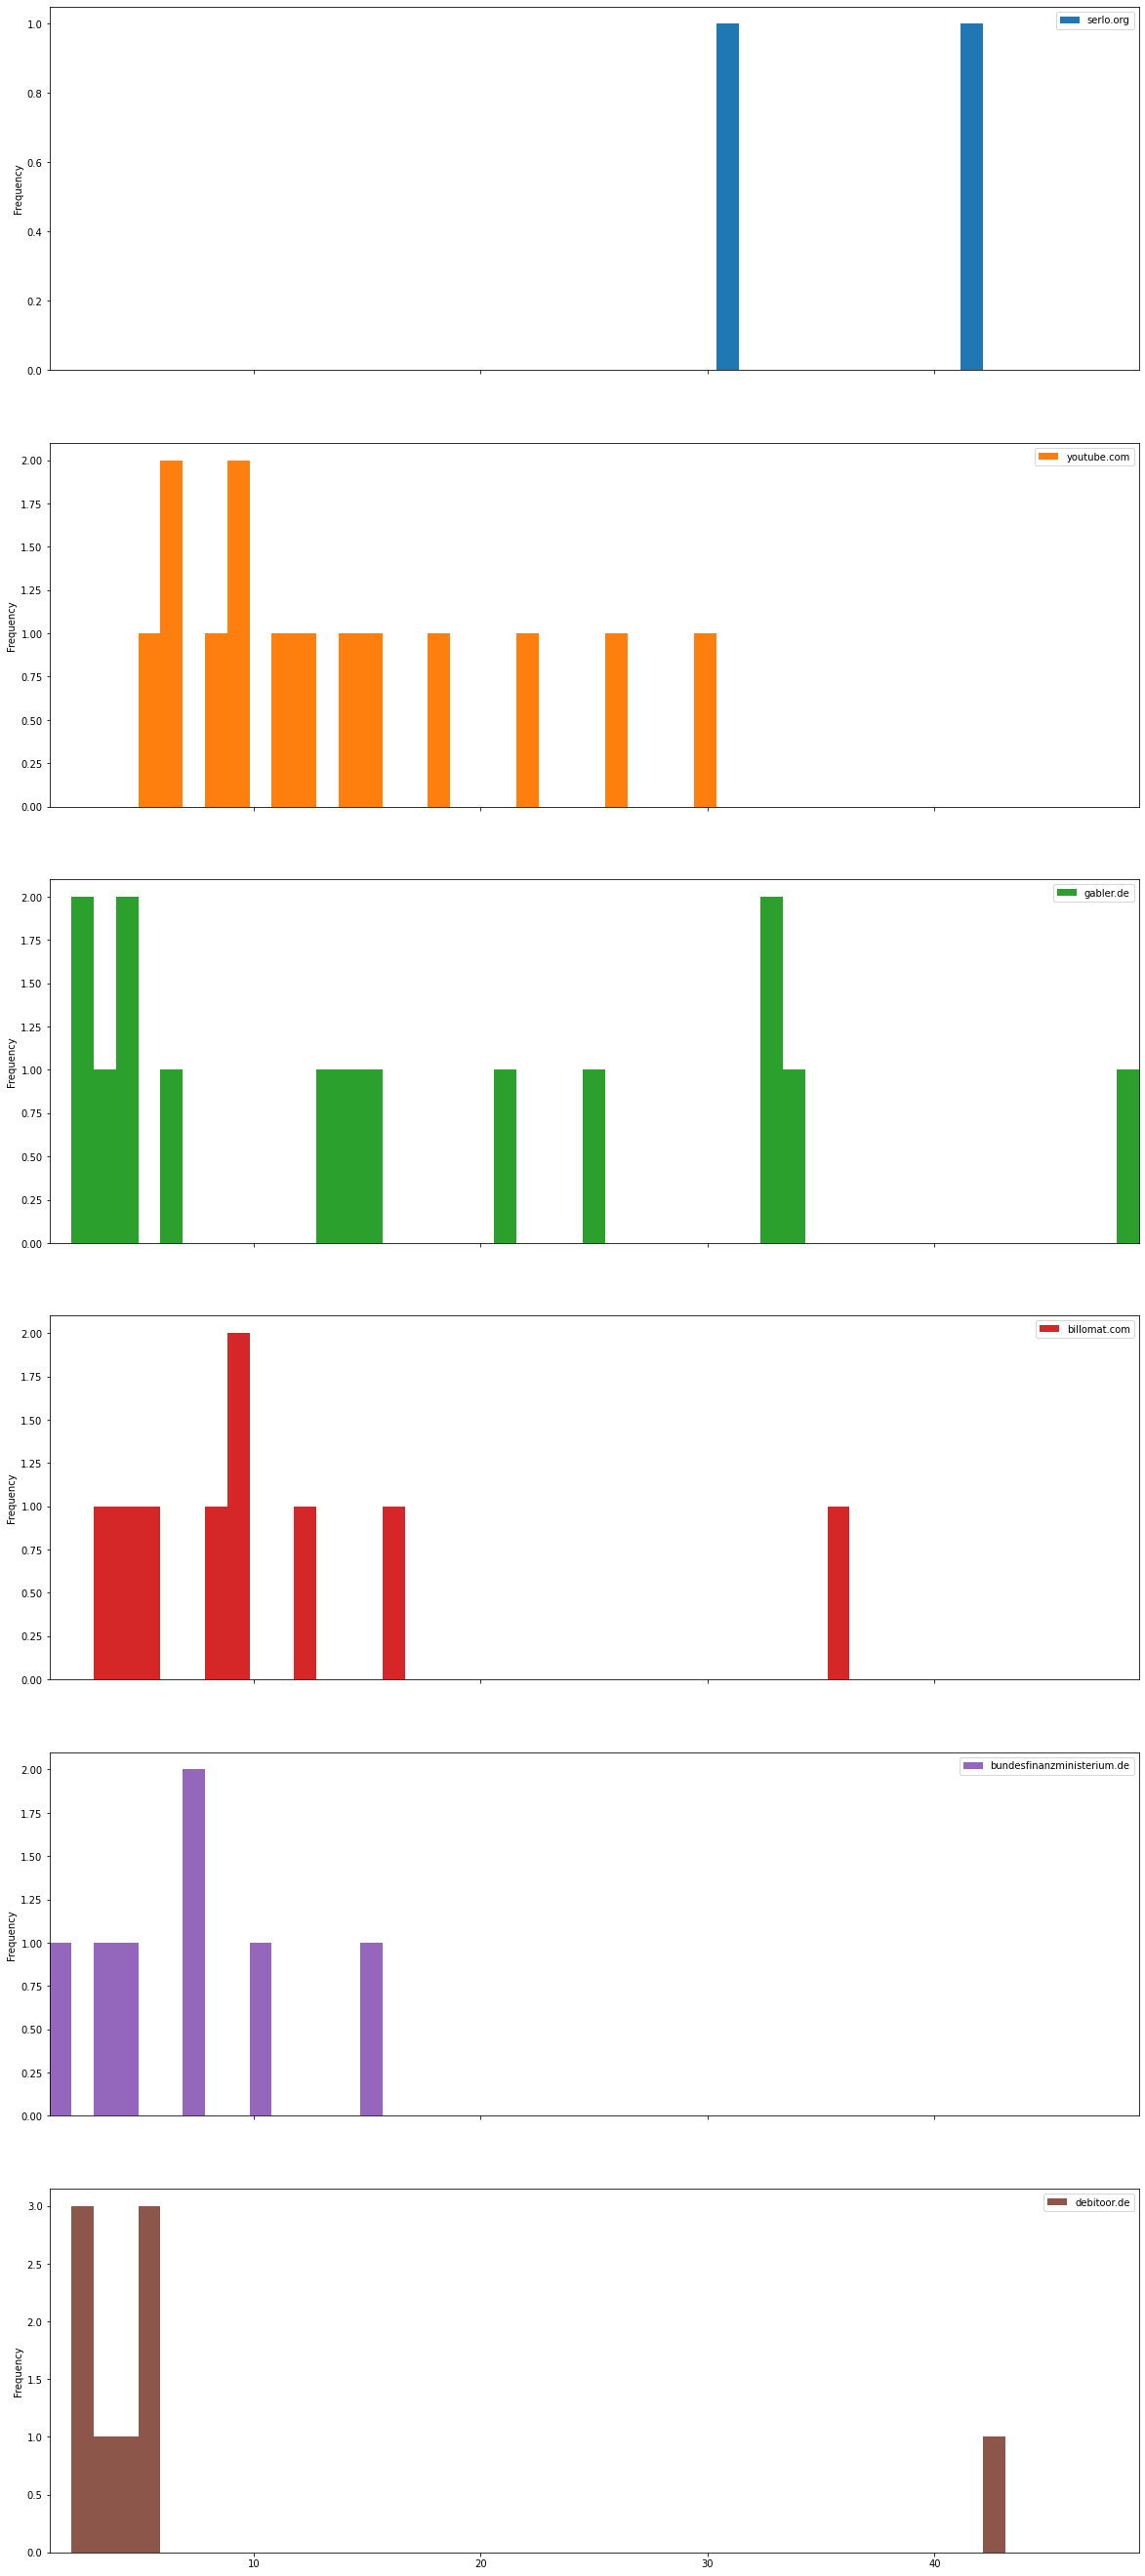

## Auswertung (subject: Chemie)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* chemie.de
* chemgapedia.de
* spektrum.de
* chemie-schule.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,chemie.de,chemgapedia.de,spektrum.de,chemie-schule.de
keyword,,,,,,
molekülmasse,13.0,3.0,2.0,43.0,10.0,5.0
isomerie,12.0,4.0,6.0,16.0,19.0,7.0
schalenmodell,5.0,NaN,6.0,NaN,24.0,19.0
kettenreaktion,NaN,7.0,3.0,13.0,19.0,12.0
halogene,NaN,3.0,5.0,6.0,13.0,7.0


### Deskriptive Auswertung

,serlo.org,youtube.com,chemie.de,chemgapedia.de,spektrum.de,chemie-schule.de
count,51.000000,61.000000,71.000000,62.000000,61.000000,59.000000
mean,16.843137,6.459016,5.140845,14.241935,15.262295,11.813559
std,13.045110,5.970968,7.821757,9.822499,9.605383,10.048974
min,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000
25%,6.500000,3.000000,2.000000,7.000000,8.000000,5.500000
50%,12.000000,5.000000,3.000000,11.500000,13.000000,7.000000
75%,24.000000,7.000000,5.000000,17.750000,20.000000,14.000000
max,47.000000,36.000000,46.000000,44.000000,50.000000,46.000000


### Historgramme

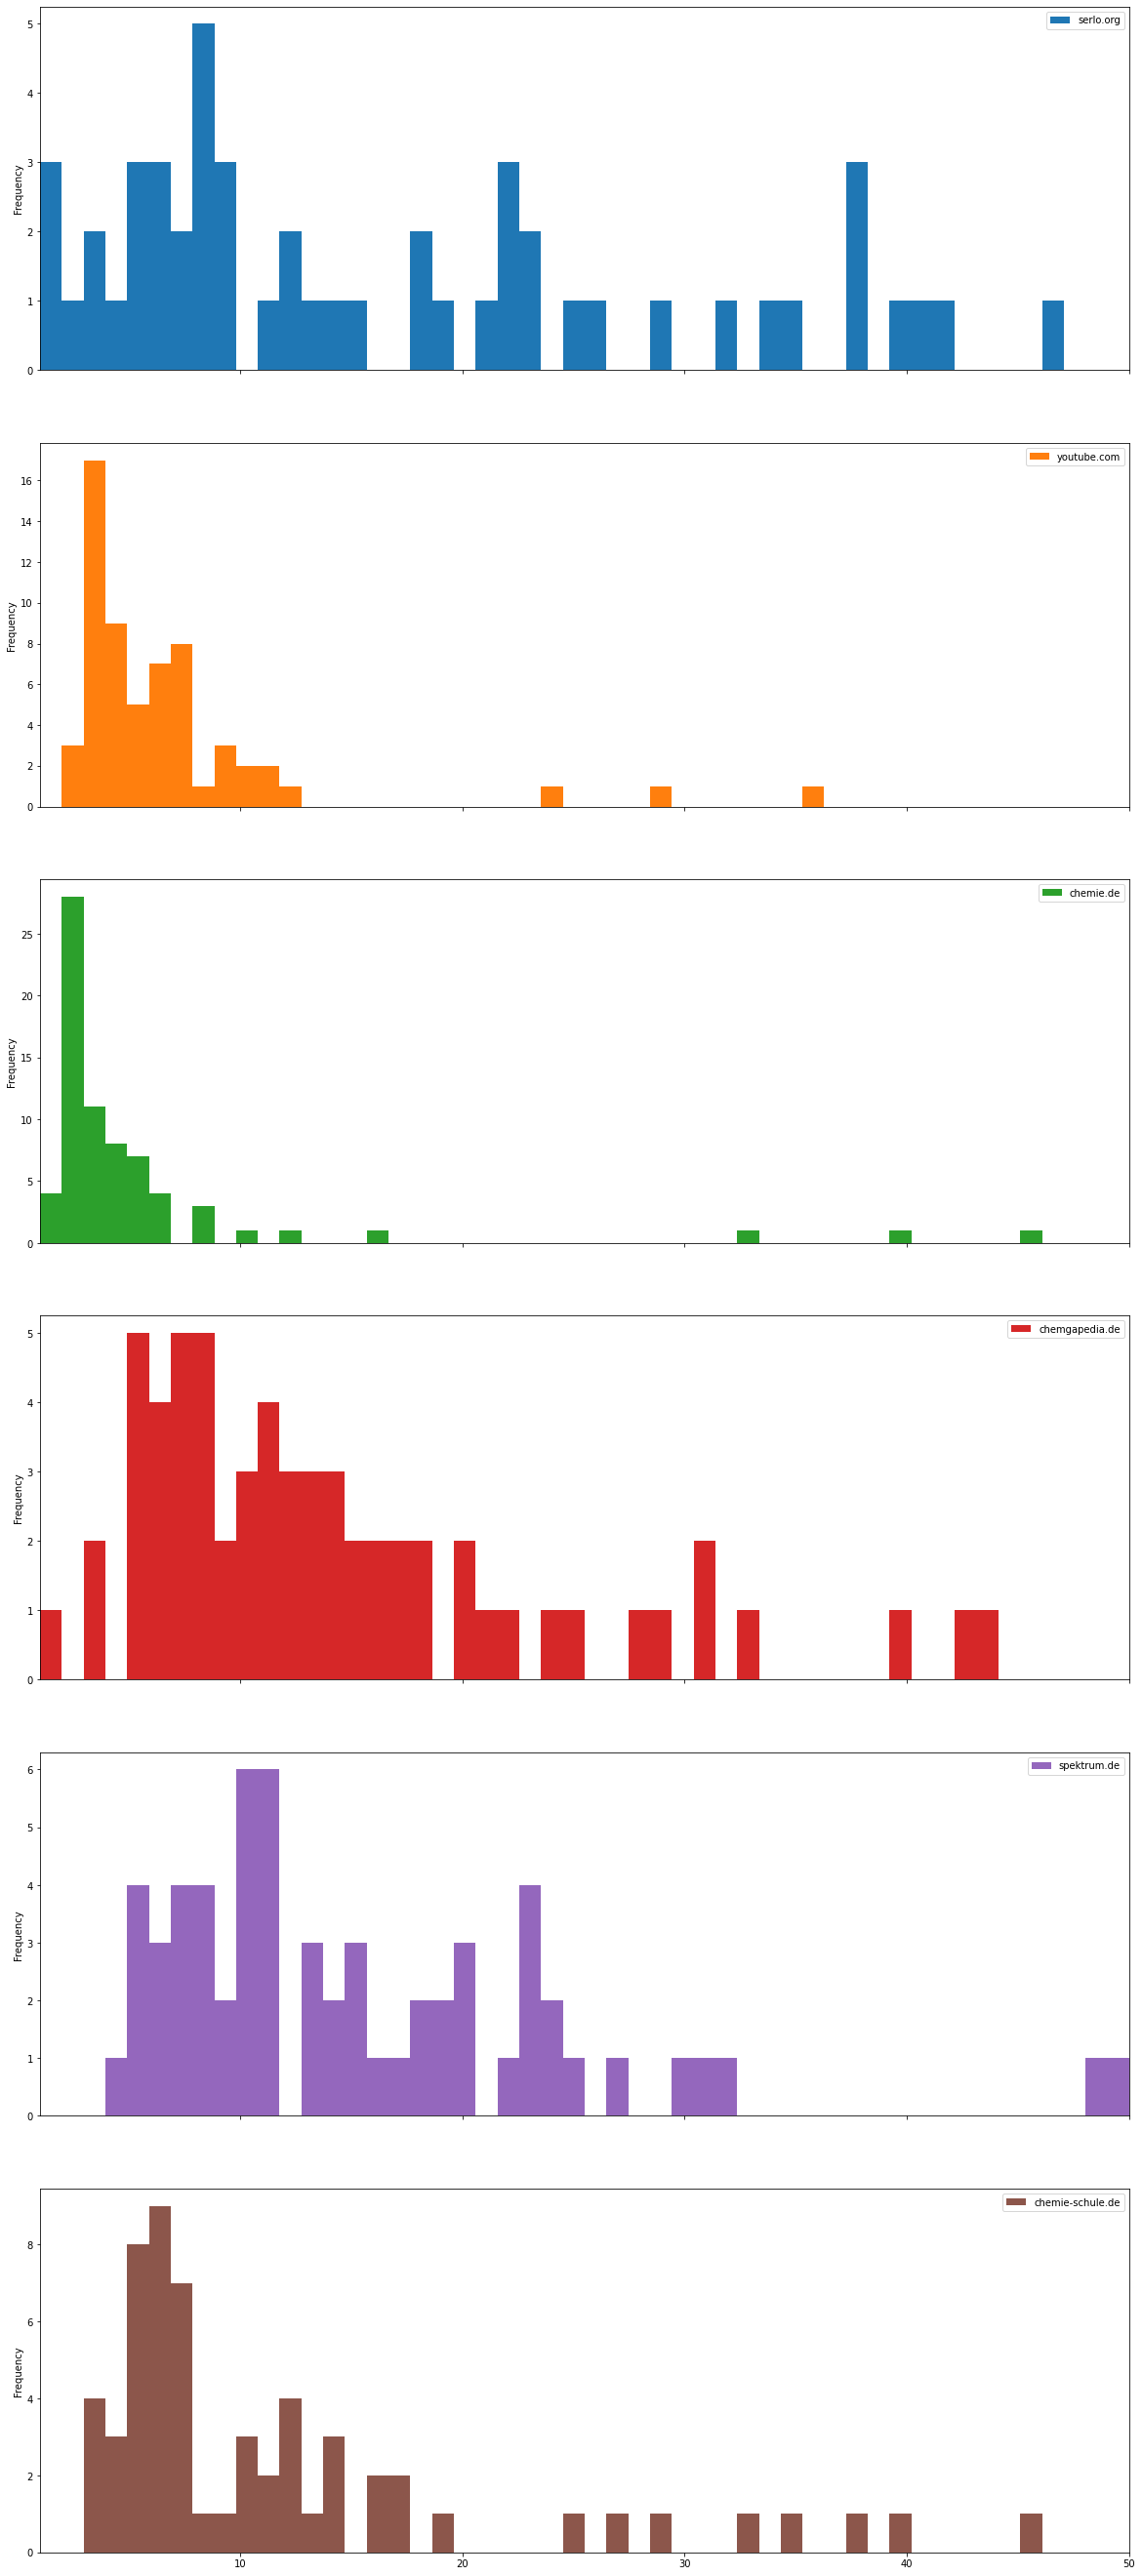

## Auswertung (subject: Biologie)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* spektrum.de
* doccheck.com
* springer.com
* biologie-seite.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,spektrum.de,doccheck.com,springer.com,biologie-seite.de
keyword,,,,,,
rauschmittel,7.0,NaN,NaN,NaN,NaN,NaN
ruhepotential,9.0,2.0,13.0,7.0,21.0,20.0
rekombination,12.0,4.0,6.0,9.0,21.0,8.0
leber,NaN,19.0,NaN,5.0,NaN,NaN
teebeutelrakete,14.0,1.0,NaN,NaN,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,spektrum.de,doccheck.com,springer.com,biologie-seite.de
count,39.000000,43.000000,38.000000,35.000000,31.000000,24.000000
mean,10.948718,13.976744,11.157895,9.685714,21.838710,13.583333
std,9.960313,11.782732,7.175508,7.858197,11.093832,13.685653
min,1.000000,1.000000,4.000000,2.000000,1.000000,3.000000
25%,4.500000,5.000000,5.250000,5.000000,14.000000,4.750000
50%,9.000000,9.000000,8.500000,7.000000,21.000000,9.000000
75%,13.000000,19.000000,15.000000,11.000000,29.000000,16.000000
max,45.000000,45.000000,32.000000,42.000000,46.000000,49.000000


### Historgramme

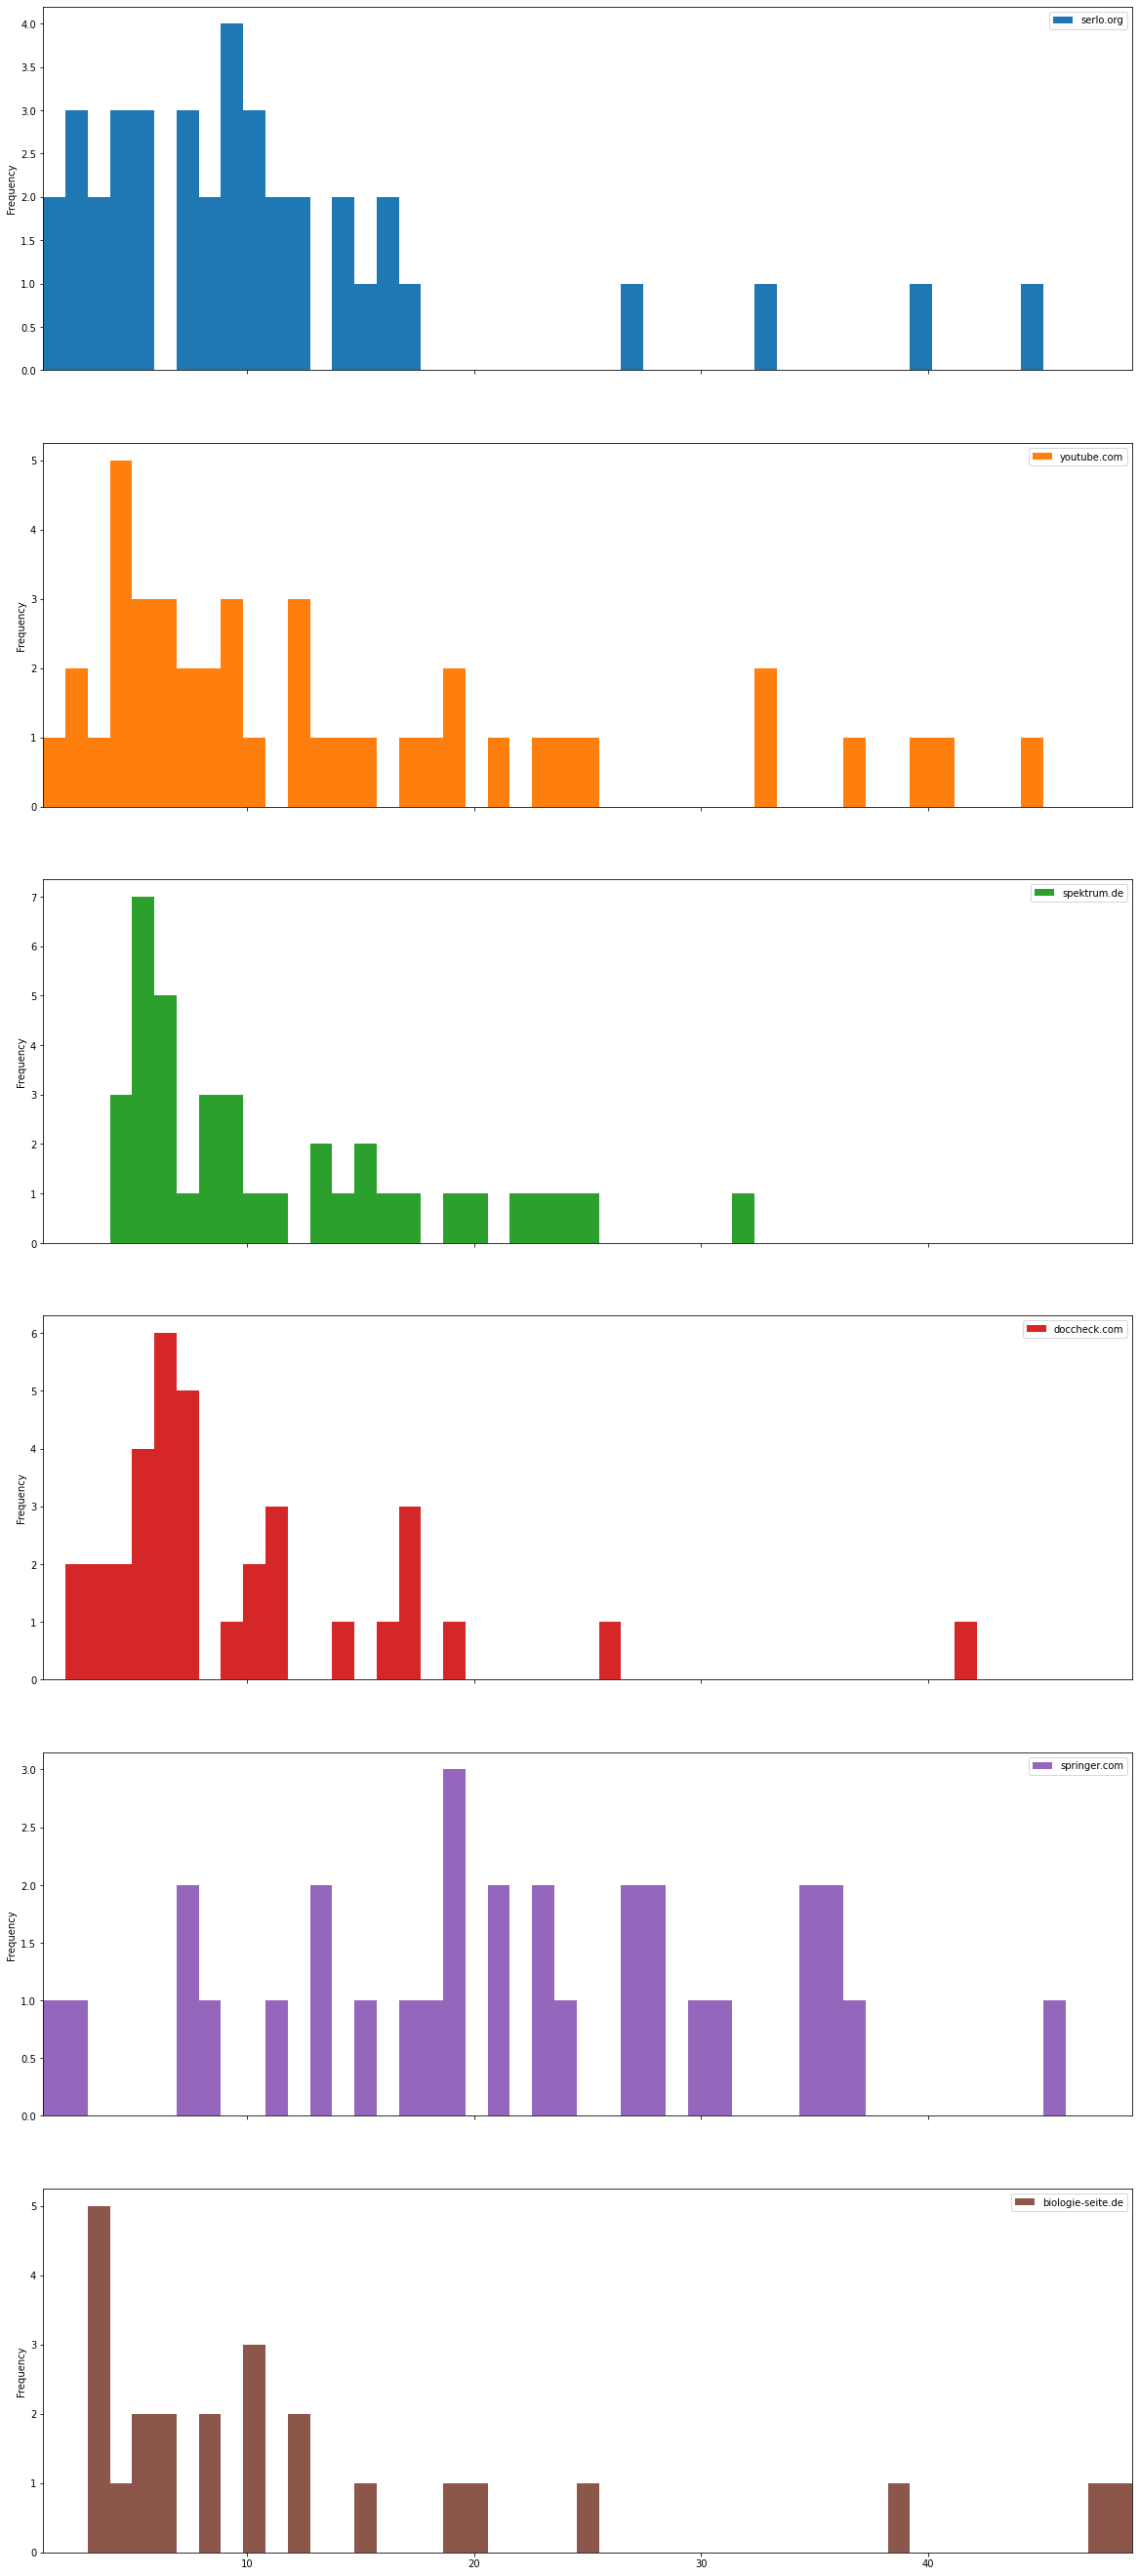

## Auswertung (subject: Mathe)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* mathebibel.de
* springer.com
* mathelounge.de
* lernhelfer.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,mathebibel.de,springer.com,mathelounge.de,lernhelfer.de
keyword,,,,,,
bruchgleichung,8.0,1.0,4.0,NaN,NaN,19.0
geometrische summenformel,24.0,4.0,NaN,NaN,20.0,NaN
substitution,2.0,1.0,9.0,NaN,NaN,NaN
partialbruchzerlegung,7.0,3.0,2.0,NaN,30.0,16.0
punktsymmetrie,4.0,2.0,14.0,NaN,39.0,18.0


### Deskriptive Auswertung

,serlo.org,youtube.com,mathebibel.de,springer.com,mathelounge.de,lernhelfer.de
count,370.000000,529.000000,226.000000,327.000000,306.000000,246.000000
mean,9.964865,6.211720,8.663717,23.865443,24.042484,19.134146
std,10.891003,6.279218,9.846024,12.469359,12.534863,11.624846
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,14.000000,14.000000,11.000000
50%,6.000000,4.000000,5.000000,23.000000,22.000000,17.000000
75%,11.000000,7.000000,10.750000,33.000000,33.750000,25.000000
max,50.000000,47.000000,49.000000,50.000000,50.000000,50.000000


### Historgramme

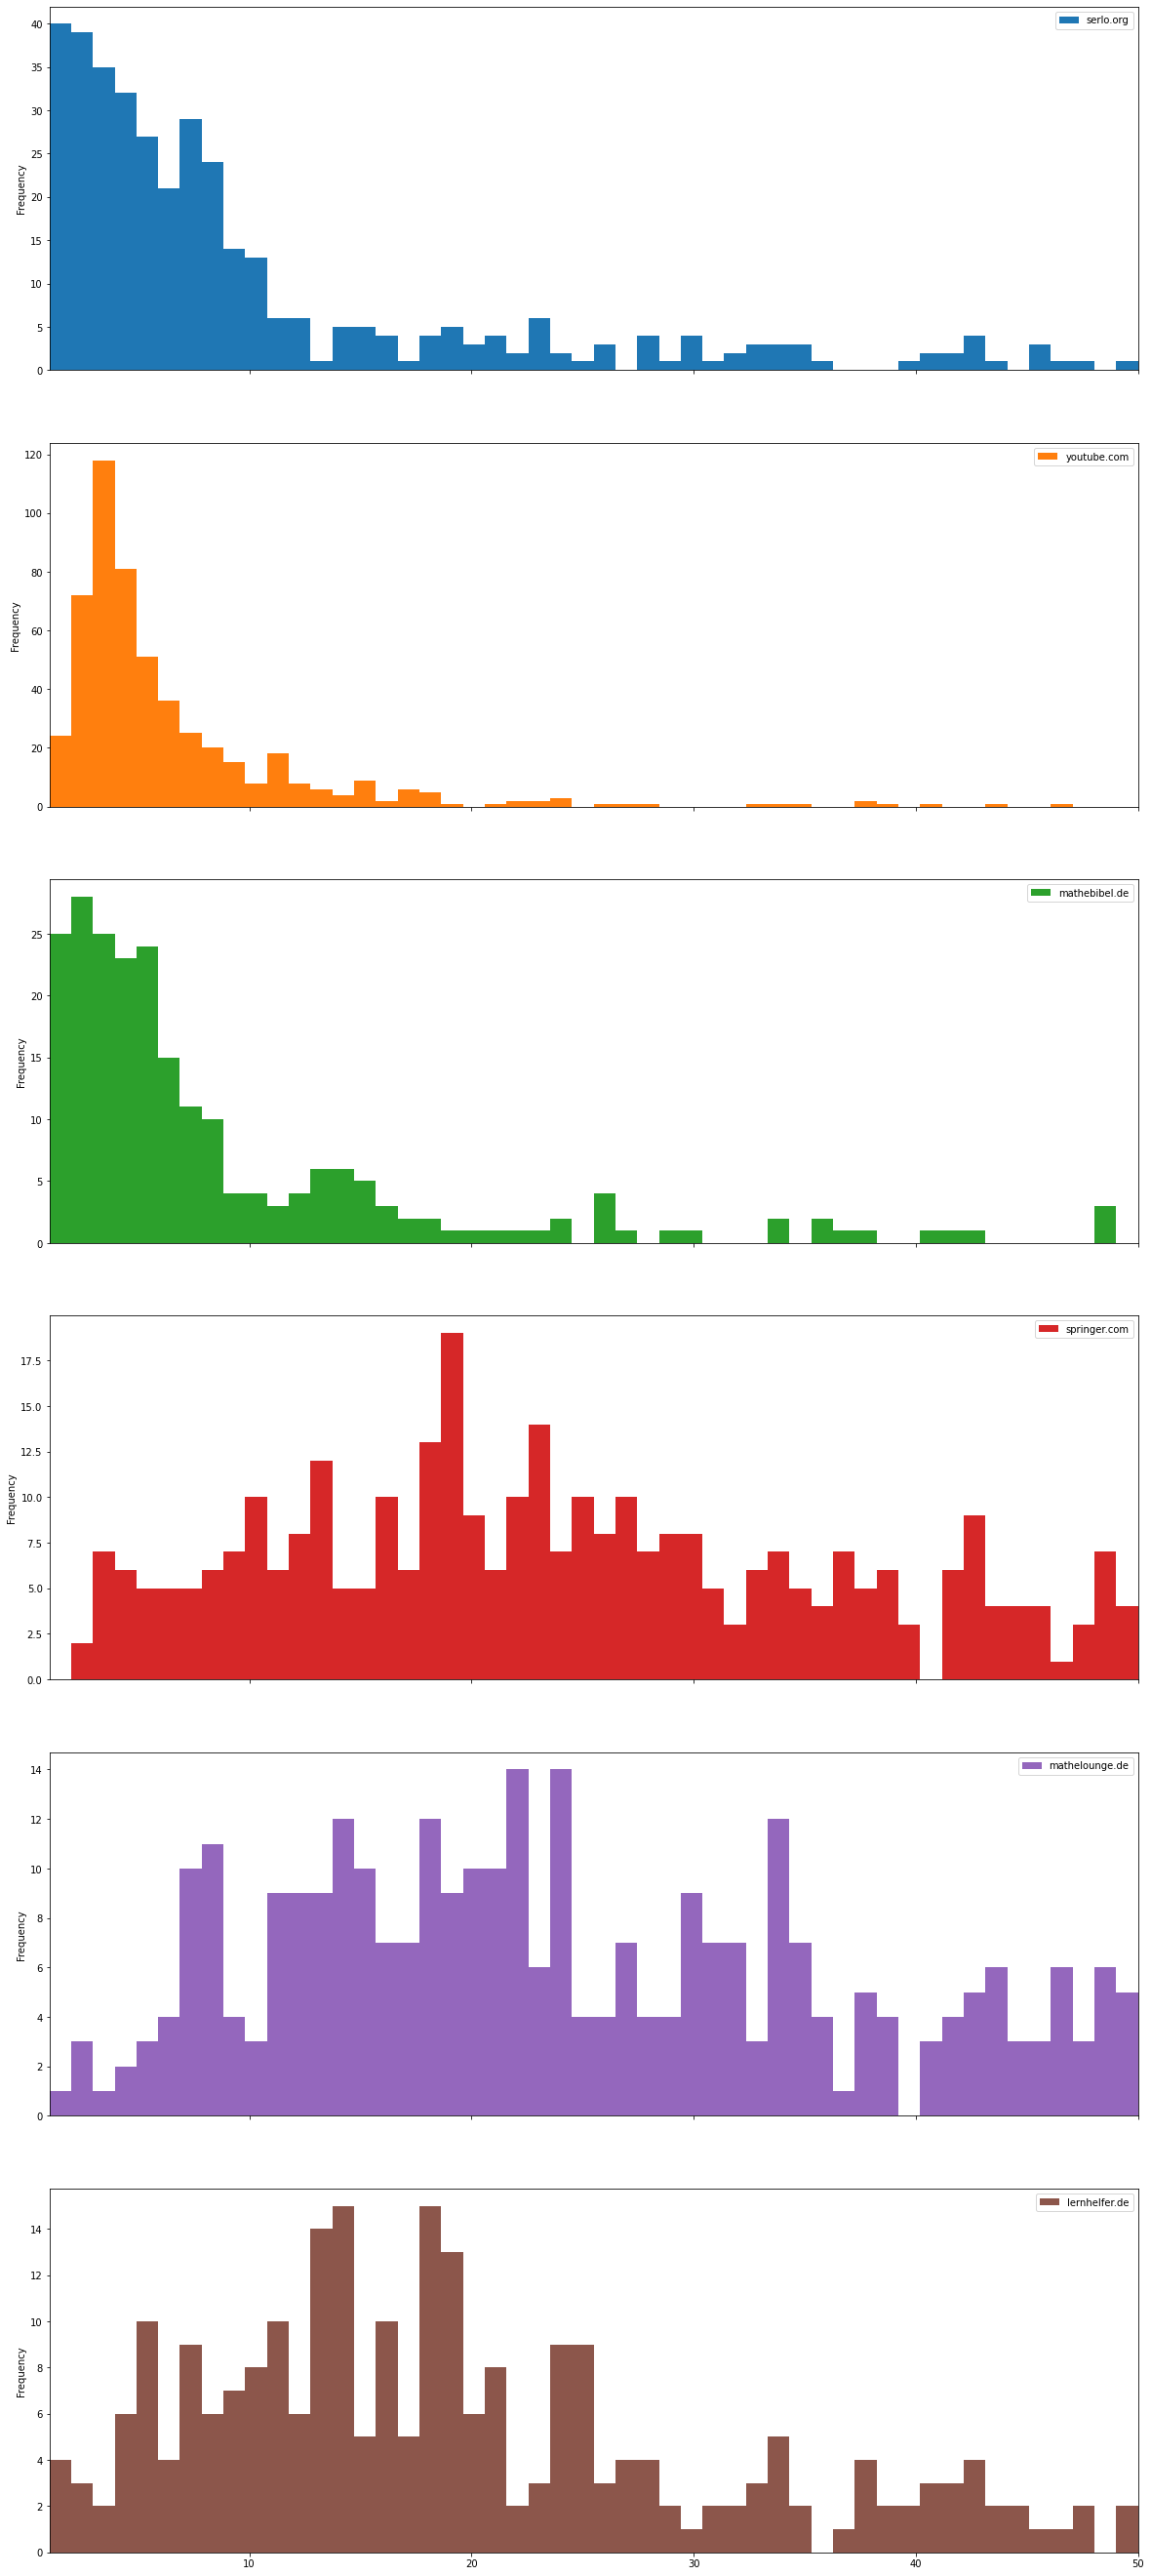

## Auswertung (subject: Physik)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* lernhelfer.de
* leifiphysik.de
* chemie.de
* studyflix.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,lernhelfer.de,leifiphysik.de,chemie.de,studyflix.de
keyword,,,,,,
dichte,NaN,6.0,9,12.0,2.0,19.0
energieformen,8.0,4.0,3,2.0,NaN,7.0
orbitaltheorie,1.0,9.0,18,NaN,16.0,29.0
radioaktivität,NaN,2.0,23,10.0,7.0,4.0
schalenmodell,5.0,NaN,13,NaN,6.0,4.0


### Deskriptive Auswertung

,serlo.org,youtube.com,lernhelfer.de,leifiphysik.de,chemie.de,studyflix.de
count,9.000000,9.000000,12.000000,10.000000,10.000000,7.000000
mean,12.666667,7.777778,9.666667,6.700000,6.400000,9.857143
std,10.087121,5.953524,6.582806,4.620005,4.141927,10.172325
min,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000
25%,7.000000,5.000000,5.250000,2.000000,4.000000,3.500000
50%,8.000000,6.000000,8.500000,6.500000,5.000000,4.000000
75%,19.000000,9.000000,13.250000,10.000000,6.750000,13.000000
max,33.000000,22.000000,23.000000,14.000000,16.000000,29.000000


### Historgramme

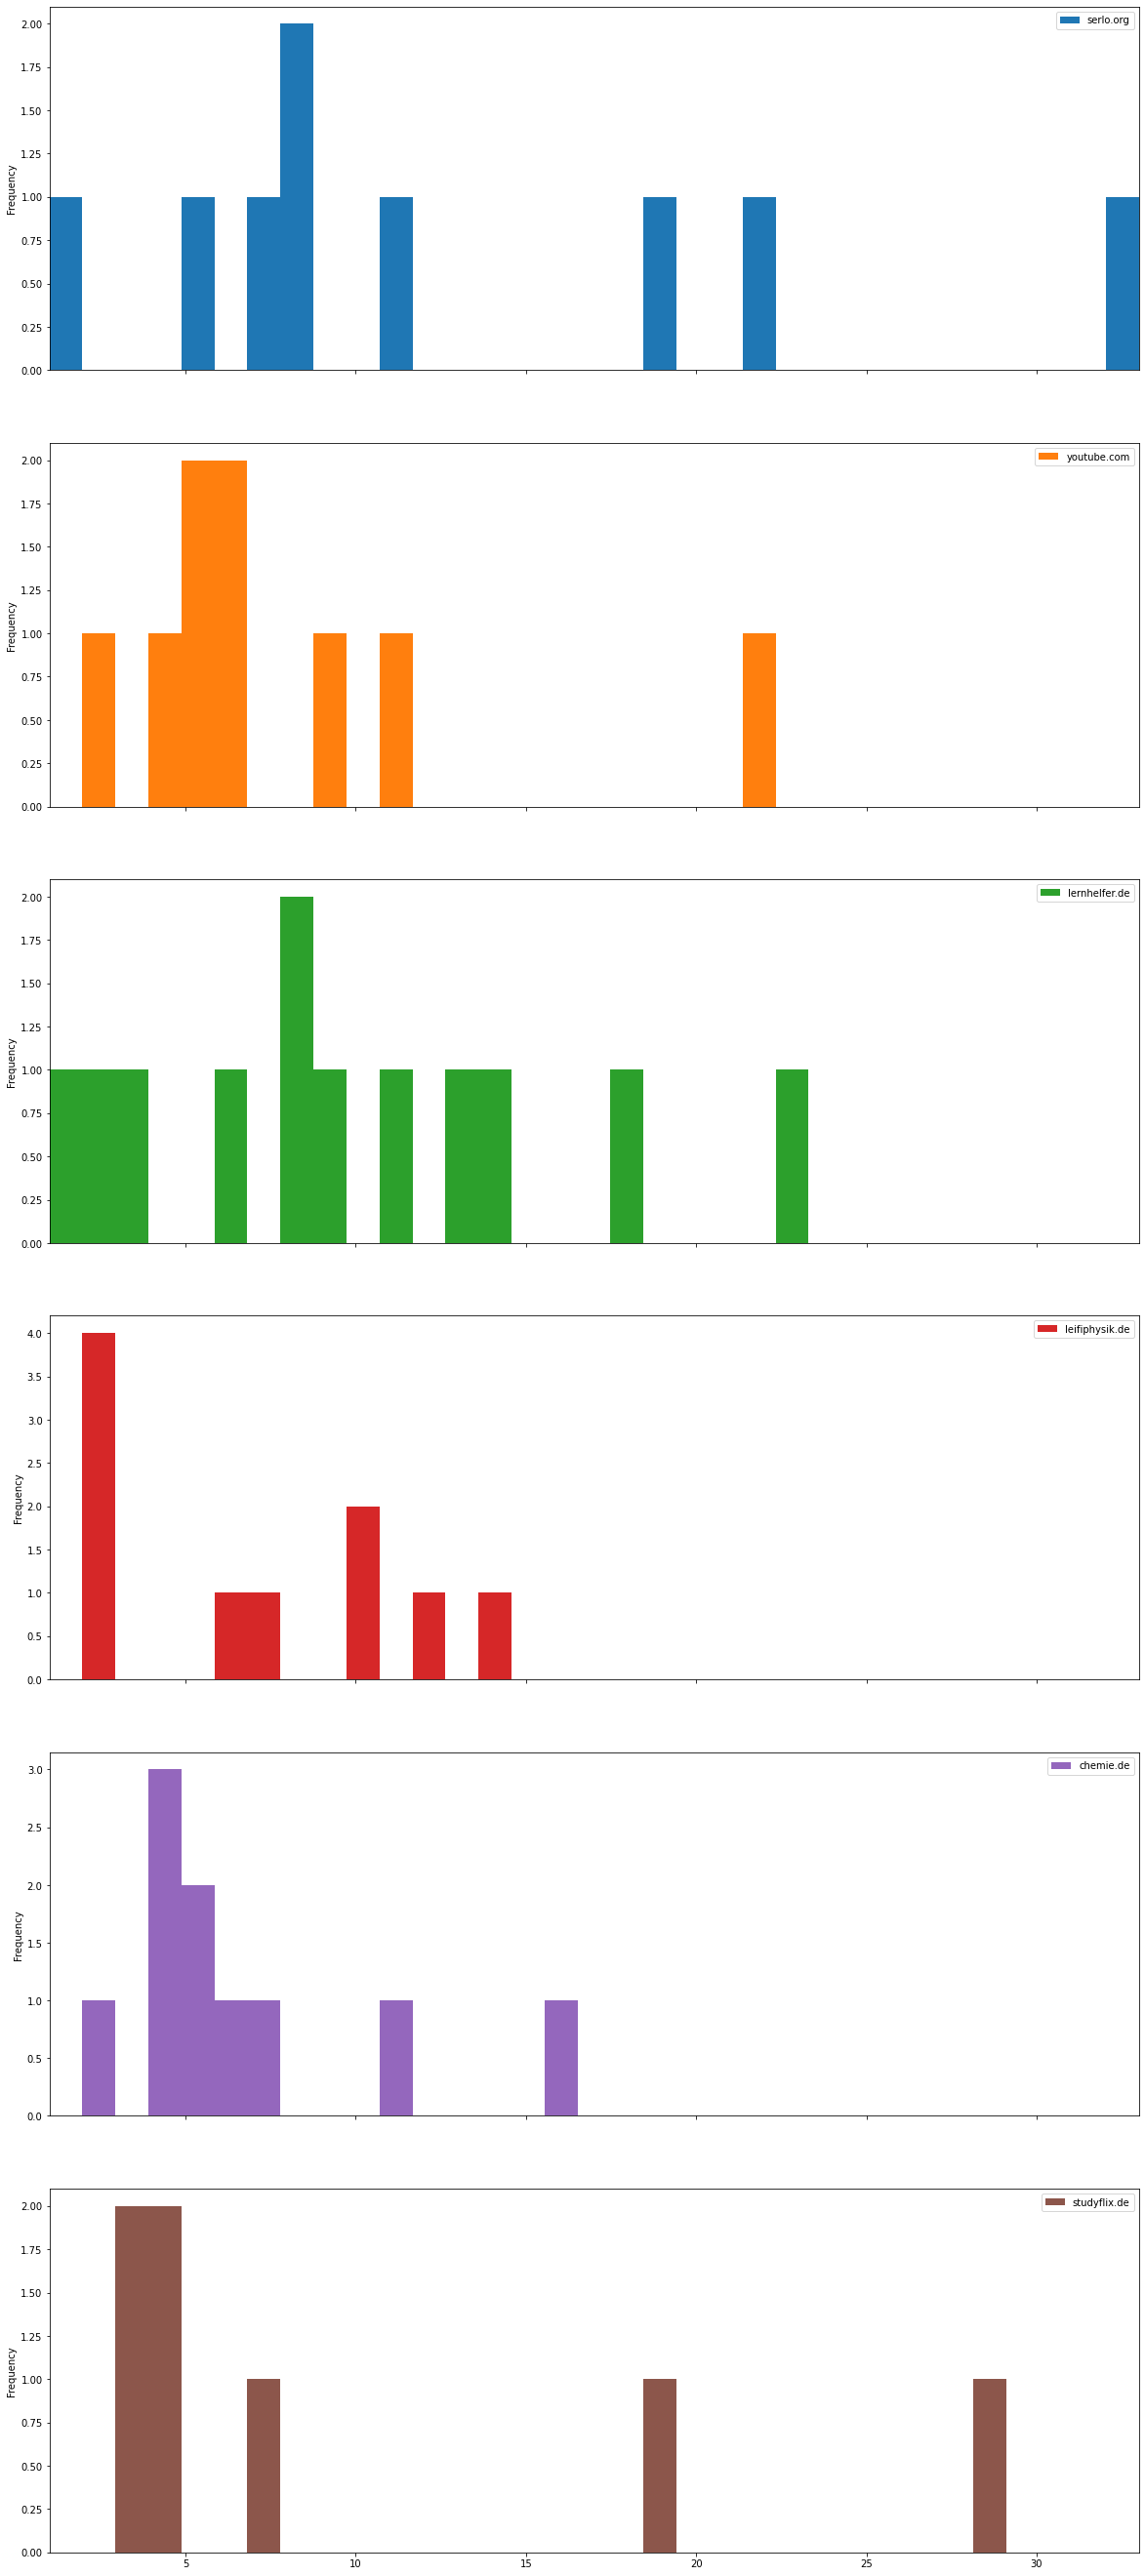

## Auswertung (subject: Geographie)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* spektrum.de
* medienwerkstatt-online.de
* sofatutor.com
* helles-koepfchen.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,spektrum.de,medienwerkstatt-online.de,sofatutor.com,helles-koepfchen.de
keyword,,,,,,
cluster,NaN,6,23,NaN,NaN,NaN
corioliskraft,12.0,4,7,NaN,19.0,27.0
plattentektonik,12.0,5,31,33.0,22.0,14.0
regenwaldzerstörung,3.0,11,18,13.0,NaN,33.0


### Deskriptive Auswertung

,serlo.org,youtube.com,spektrum.de,medienwerkstatt-online.de,sofatutor.com,helles-koepfchen.de
count,3.000000,4.000000,4.000000,2.000000,2.00000,3.000000
mean,9.000000,6.500000,19.750000,23.000000,20.50000,24.666667
std,5.196152,3.109126,10.045729,14.142136,2.12132,9.712535
min,3.000000,4.000000,7.000000,13.000000,19.00000,14.000000
25%,7.500000,4.750000,15.250000,18.000000,19.75000,20.500000
50%,12.000000,5.500000,20.500000,23.000000,20.50000,27.000000
75%,12.000000,7.250000,25.000000,28.000000,21.25000,30.000000
max,12.000000,11.000000,31.000000,33.000000,22.00000,33.000000


### Historgramme

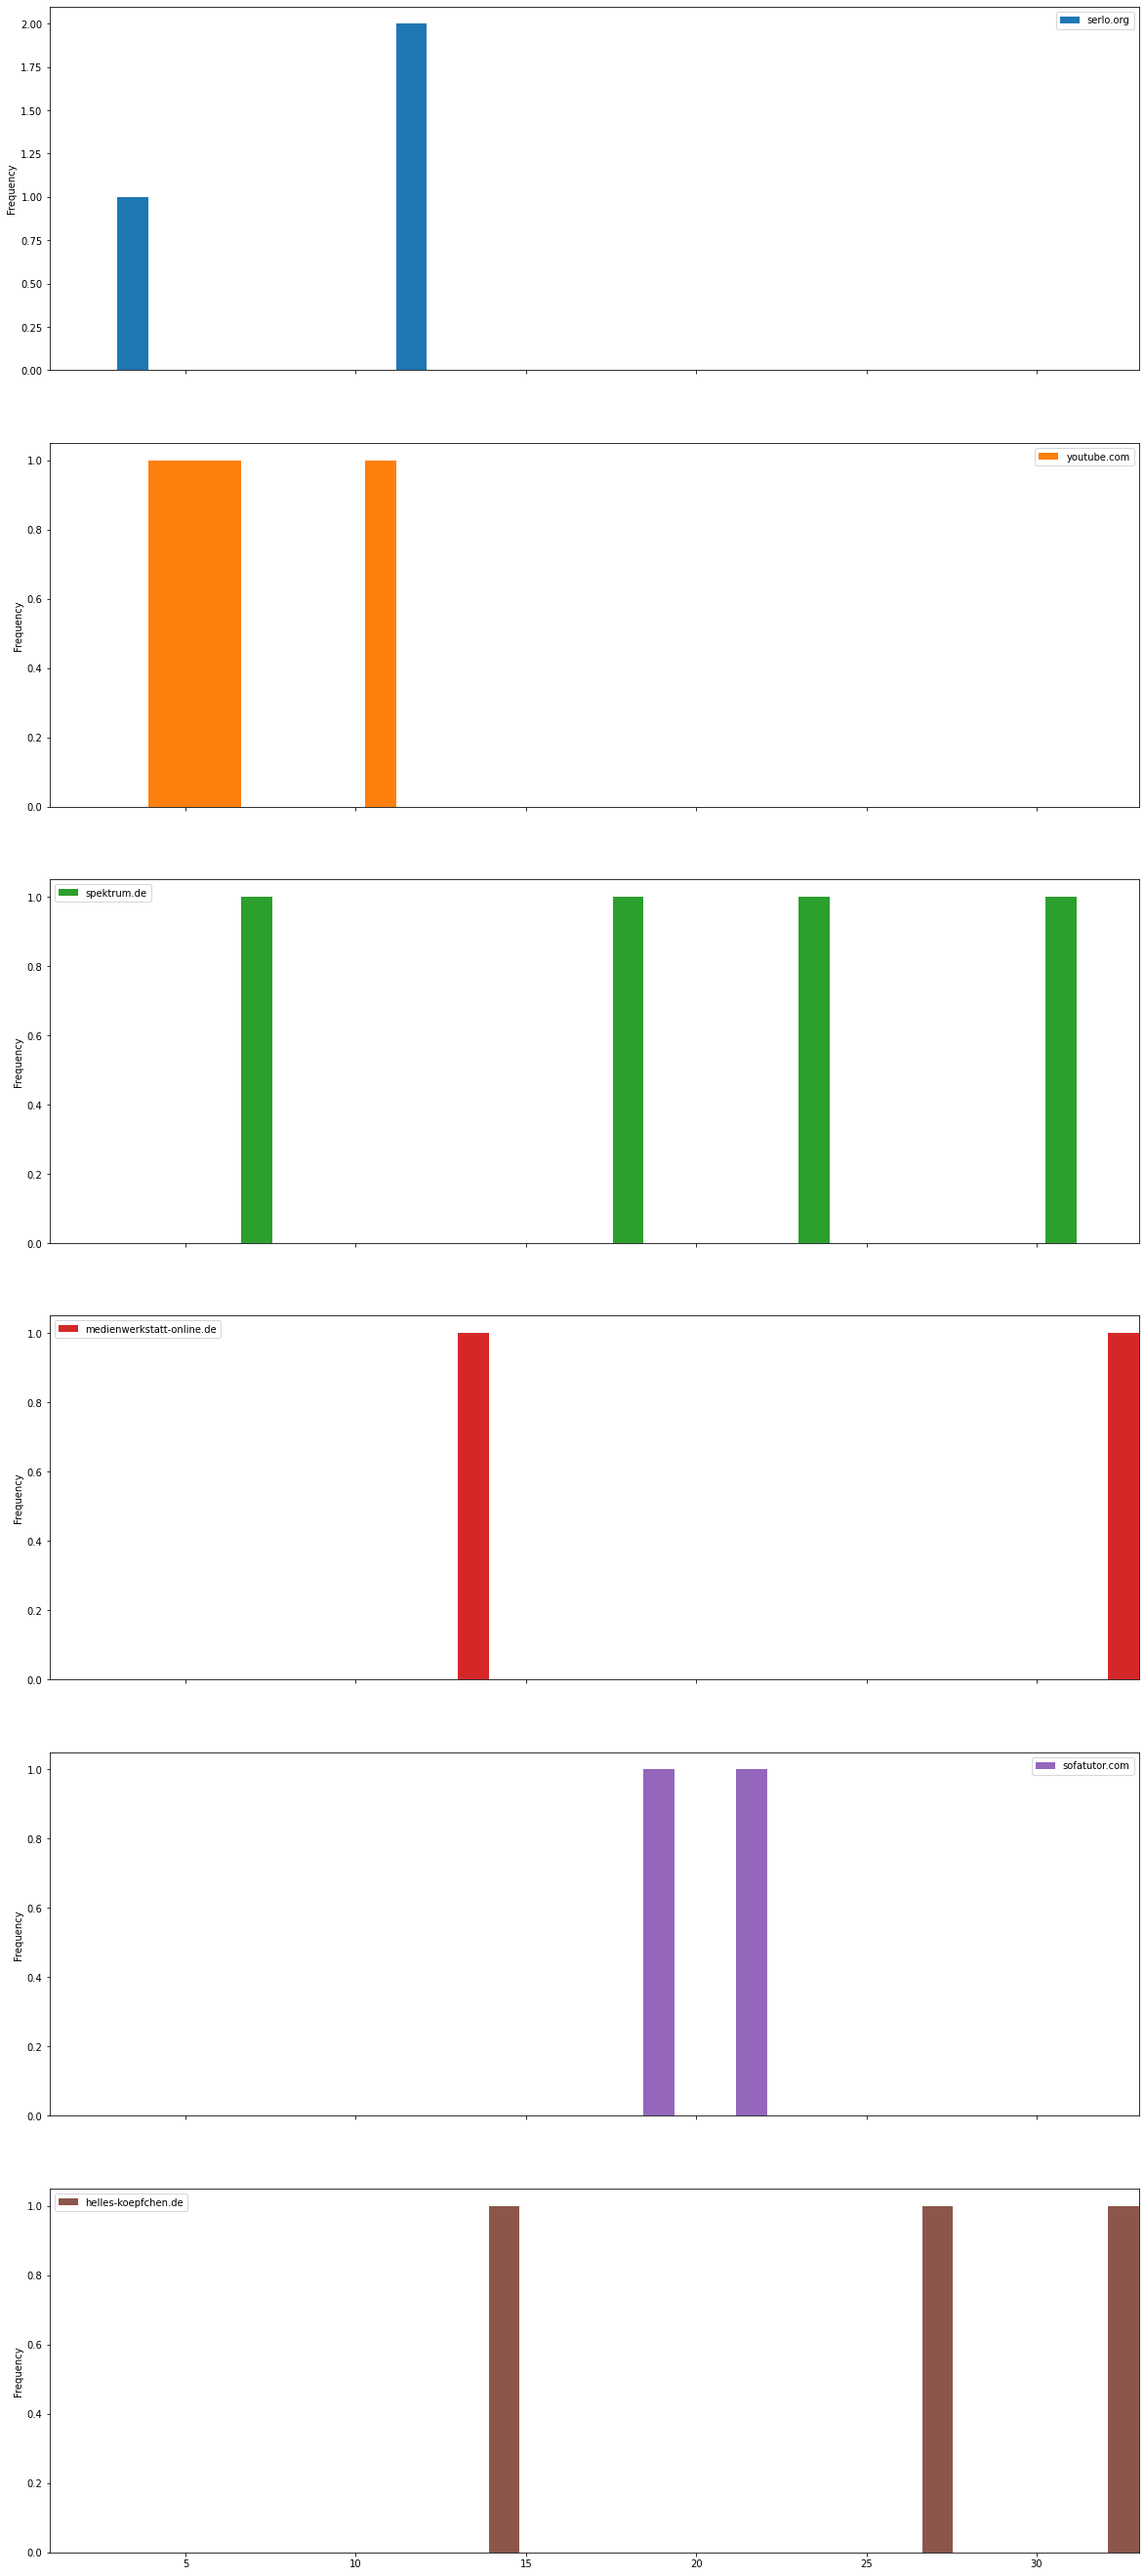

## Auswertung (subject: Informatik)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* duden.de
* wortbedeutung.info
* linguee.de
* gabler.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,duden.de,wortbedeutung.info,linguee.de,gabler.de
keyword,,,,,,
array,24.0,17.0,NaN,20.0,42.0,14.0
hexadezimalsystem,6.0,2.0,50.0,33.0,NaN,NaN
quellennachweise,12.0,NaN,17.0,NaN,19.0,NaN
pflichtenheft,NaN,10.0,36.0,NaN,NaN,38.0
abfragen,NaN,48.0,2.0,6.0,10.0,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,duden.de,wortbedeutung.info,linguee.de,gabler.de
count,30.000000,28.000000,18.000000,12.000000,17.000000,12.000000
mean,11.433333,12.571429,17.444444,13.750000,28.764706,16.500000
std,10.676055,11.577208,15.185993,9.304202,12.295982,11.524677
min,1.000000,2.000000,1.000000,4.000000,10.000000,4.000000
25%,1.500000,4.000000,2.750000,6.000000,19.000000,6.750000
50%,10.000000,9.000000,18.000000,9.500000,32.000000,13.000000
75%,18.750000,15.500000,27.500000,20.500000,41.000000,24.000000
max,41.000000,48.000000,50.000000,33.000000,43.000000,38.000000


### Historgramme

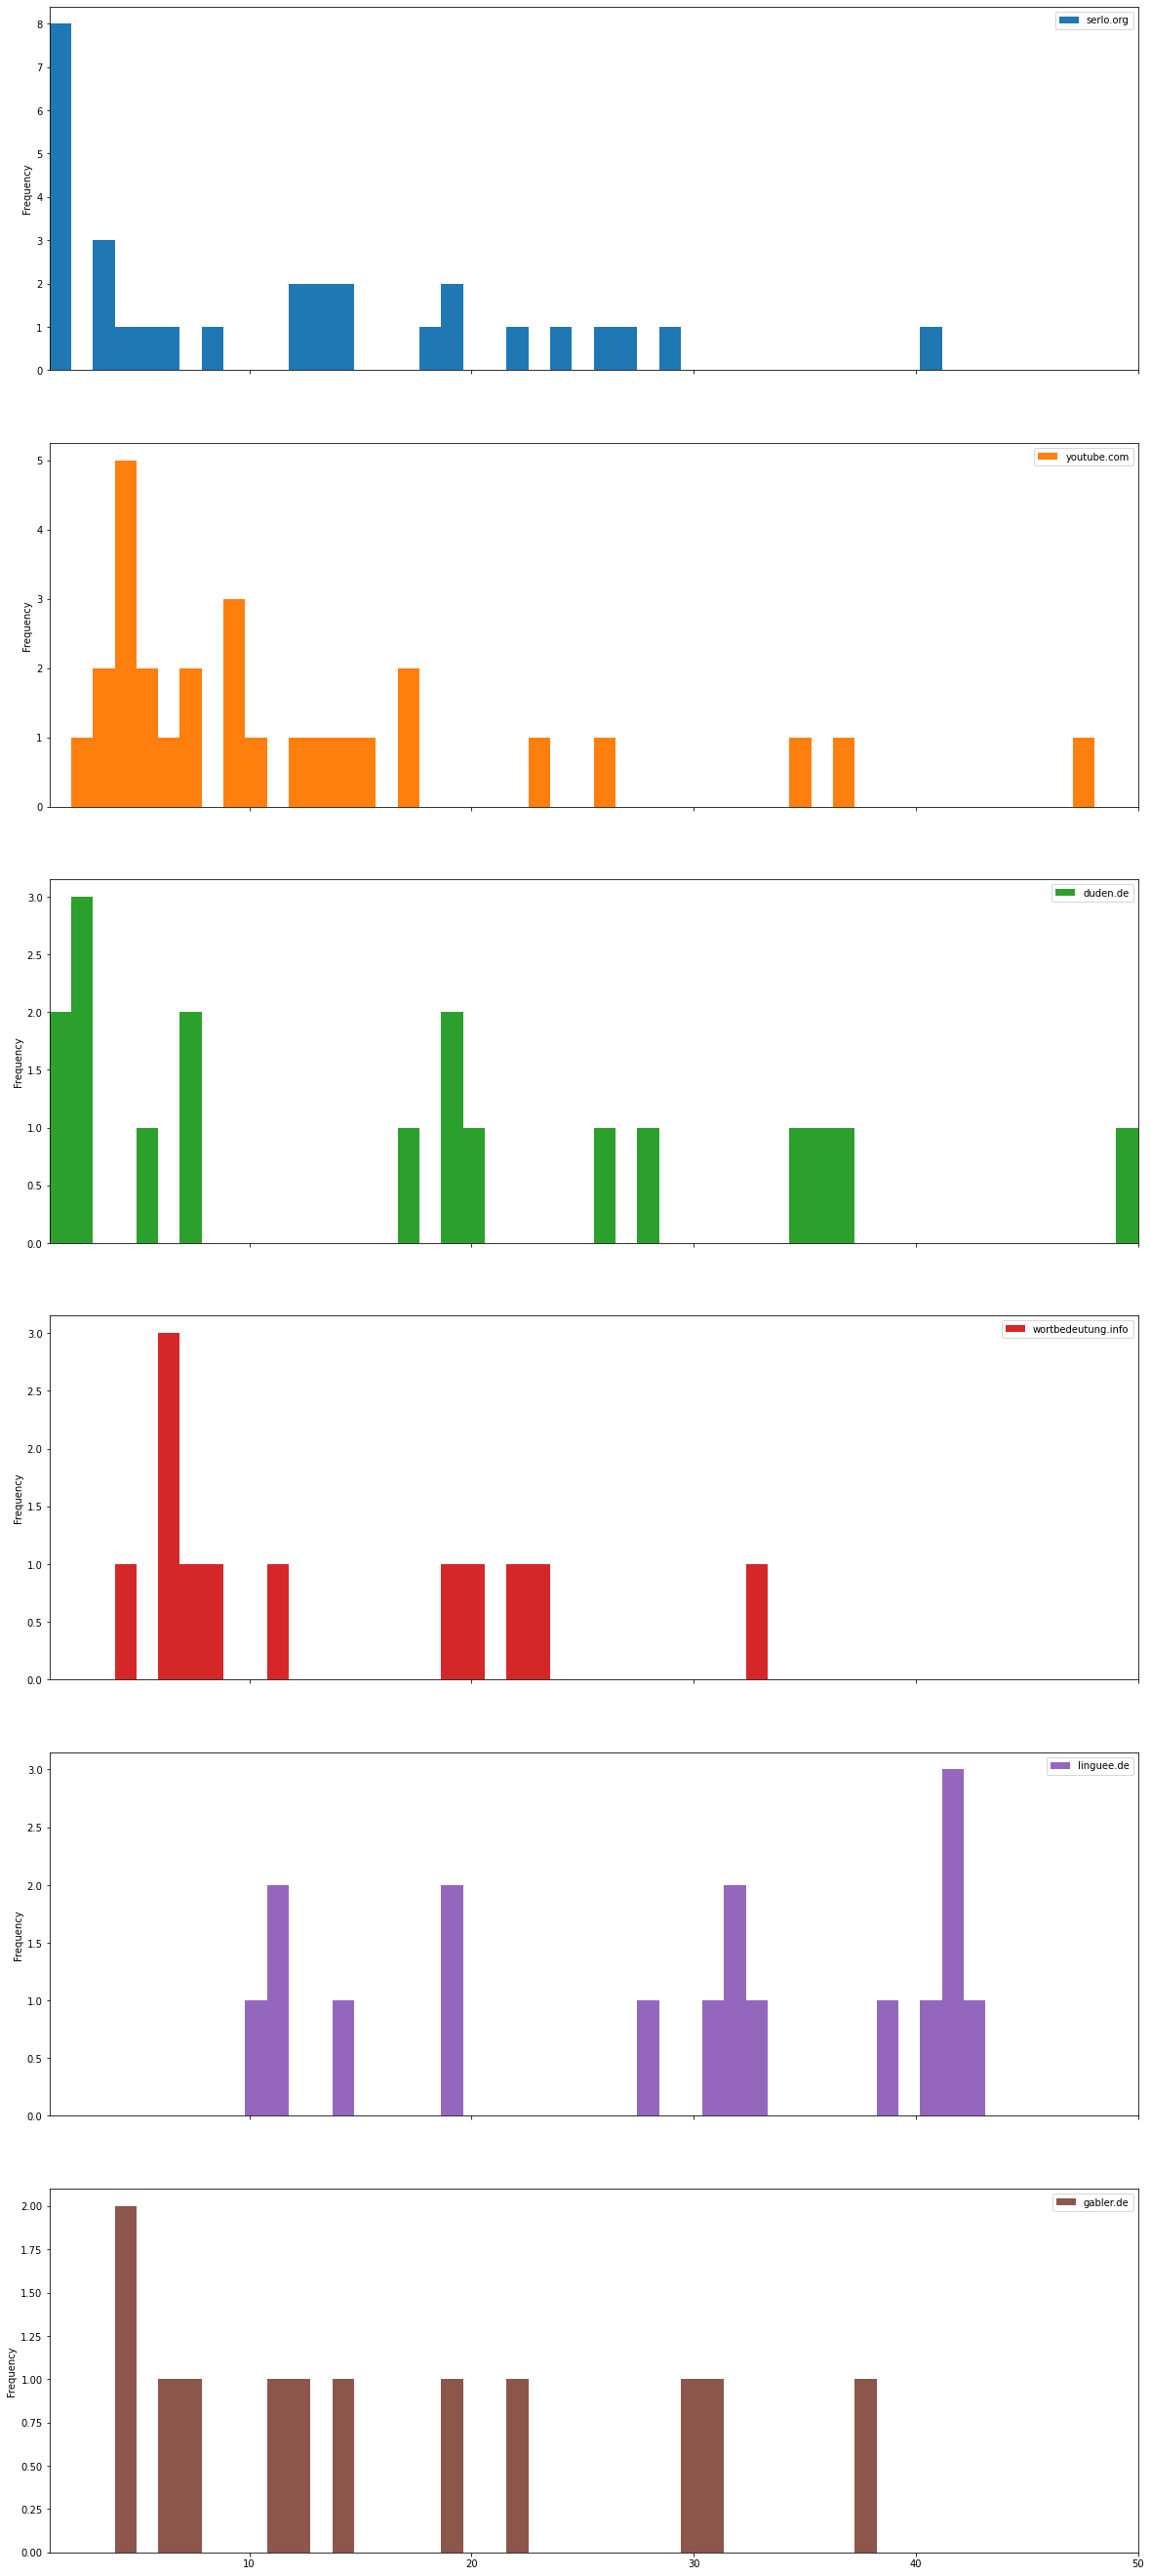

In [78]:
def get_distinct_values(prop):
    return set((entry[prop] for entry in all_keyword_entries))

for subject in get_distinct_values("subject"):
    analyse(query={"subject": subject}, blacklist=["wikipedia.org", "wiktionary.org"], no_domains=5)

## Auswertung (scope: hochschule)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* springer.com
* mathelounge.de
* matheplanet.com
* mathepedia.de
* massmatics.de
* ac.at

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,ac.at
keyword,,,,,,,,
geometrische summenformel,24.0,4.0,NaN,20.0,27.0,32.0,16.0,13.0
span,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beweis infimum,2.0,3.0,NaN,5.0,9.0,7.0,21.0,NaN
aussagen negieren,NaN,3.0,45.0,2.0,24.0,NaN,NaN,NaN
reelle zahlen,10.0,4.0,31.0,NaN,NaN,46.0,37.0,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,ac.at
count,156.000000,334.000000,273.000000,213.000000,173.000000,152.000000,132.000000,134.000000
mean,14.852564,6.068862,23.153846,21.558685,23.294798,17.921053,16.757576,25.962687
std,13.291183,5.943027,12.630719,11.875636,13.231386,13.831783,13.785223,13.230977
min,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
25%,4.000000,3.000000,13.000000,13.000000,11.000000,6.750000,5.000000,14.000000
50%,9.000000,4.000000,21.000000,20.000000,20.000000,11.500000,13.500000,27.000000
75%,23.000000,7.000000,33.000000,30.000000,35.000000,28.000000,26.000000,36.000000
max,47.000000,47.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000


### Historgramme

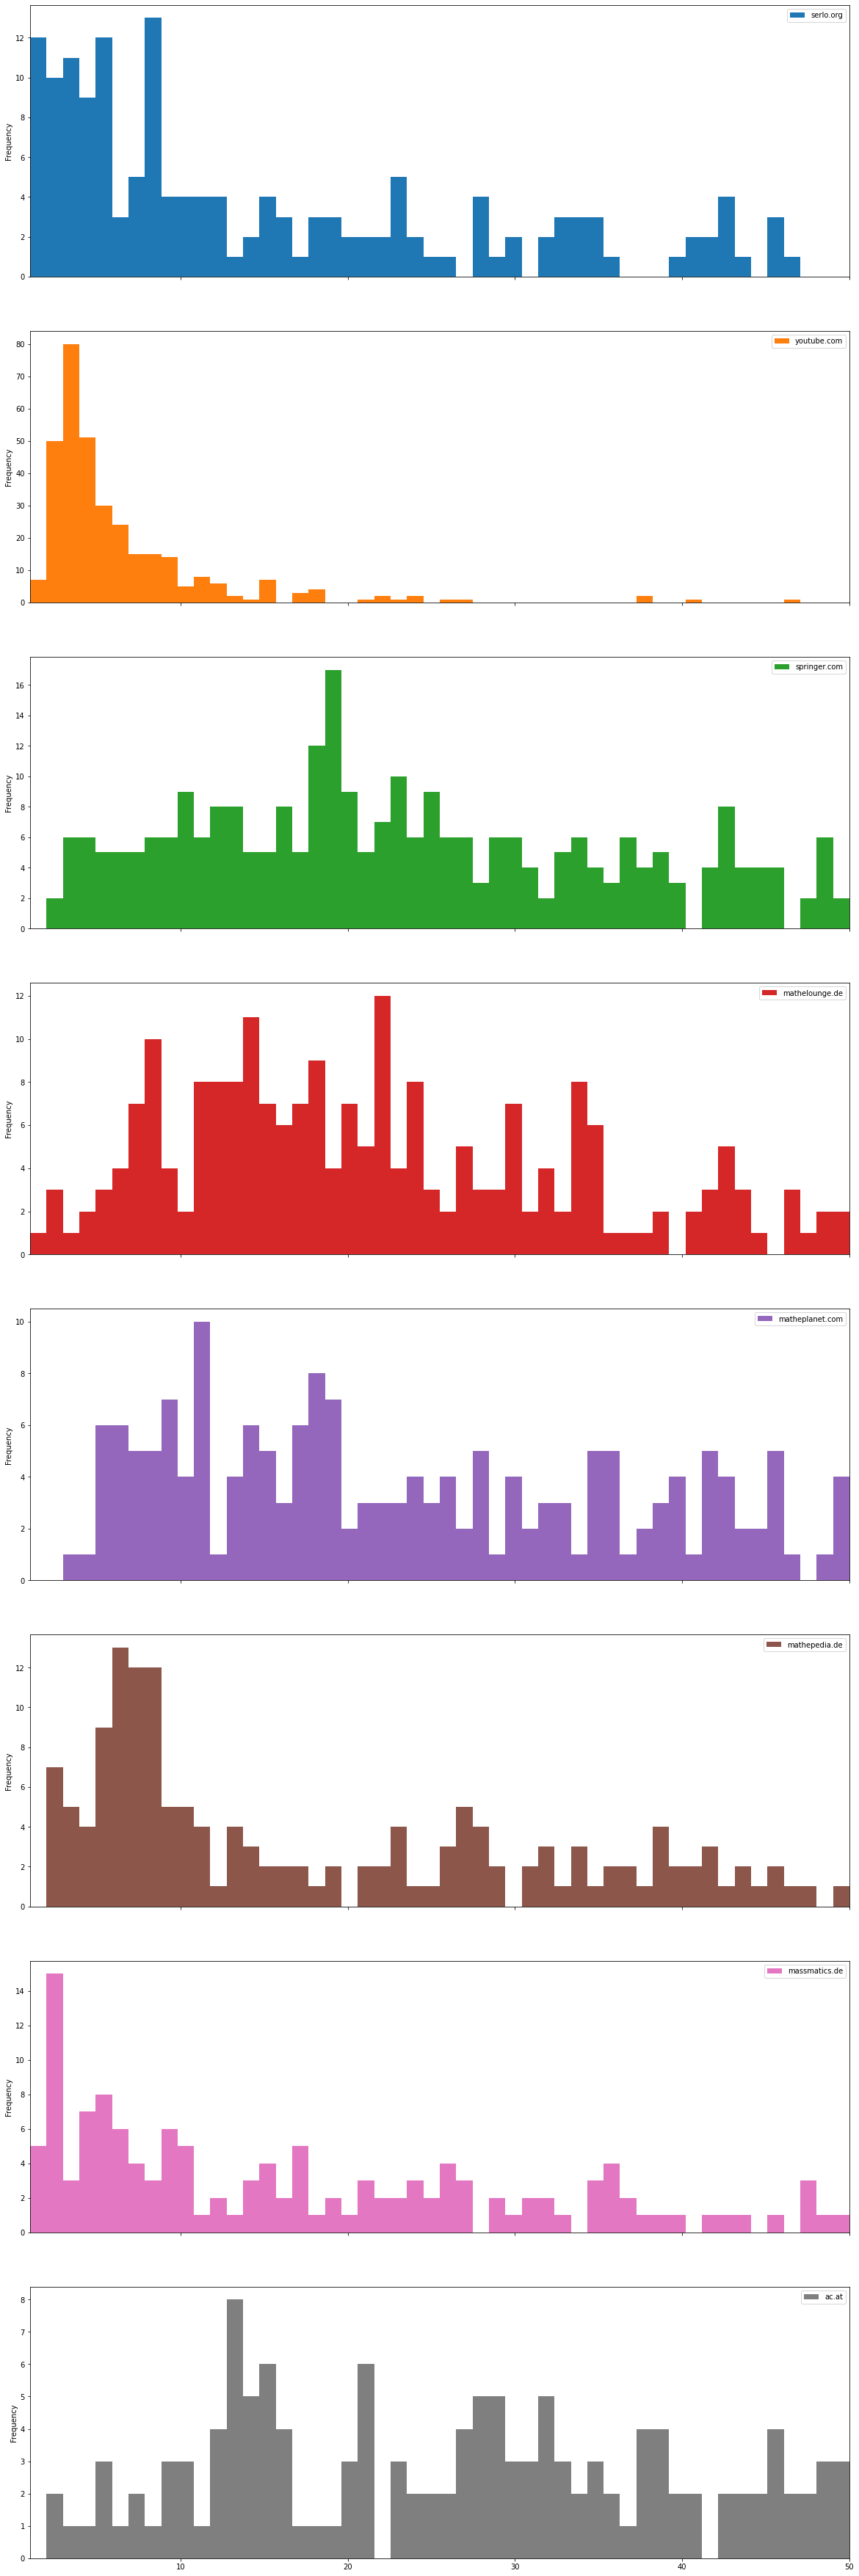

## Auswertung (scope: schule)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* lernhelfer.de
* spektrum.de
* wiktionary.org
* mathebibel.de
* studyflix.de
* dwds.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,lernhelfer.de,spektrum.de,wiktionary.org,mathebibel.de,studyflix.de,dwds.de
keyword,,,,,,,,
molekülmasse,13.0,3.0,11.0,10.0,NaN,NaN,16.0,NaN
bruchgleichung,8.0,1.0,19.0,NaN,NaN,4.0,43.0,NaN
substitution,2.0,1.0,NaN,46.0,NaN,9.0,50.0,15.0
halogene,NaN,3.0,1.0,13.0,NaN,NaN,4.0,NaN
blut,40.0,18.0,NaN,NaN,44.0,NaN,NaN,46.0


### Deskriptive Auswertung

,serlo.org,youtube.com,lernhelfer.de,spektrum.de,wiktionary.org,mathebibel.de,studyflix.de,dwds.de
count,384.000000,388.000000,245.000000,217.000000,224.000000,154.000000,168.000000,200.000000
mean,9.833333,8.484536,16.771429,21.281106,20.406250,8.227273,10.922619,17.970000
std,10.152021,8.449104,11.317548,13.450845,12.566243,8.602722,11.634657,13.758108
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,8.000000,10.000000,9.000000,3.000000,3.750000,6.000000
50%,7.000000,5.000000,15.000000,19.000000,18.000000,5.000000,6.000000,13.500000
75%,12.000000,10.250000,23.000000,31.000000,29.000000,9.000000,13.250000,30.000000
max,50.000000,48.000000,49.000000,50.000000,50.000000,49.000000,50.000000,47.000000


### Historgramme

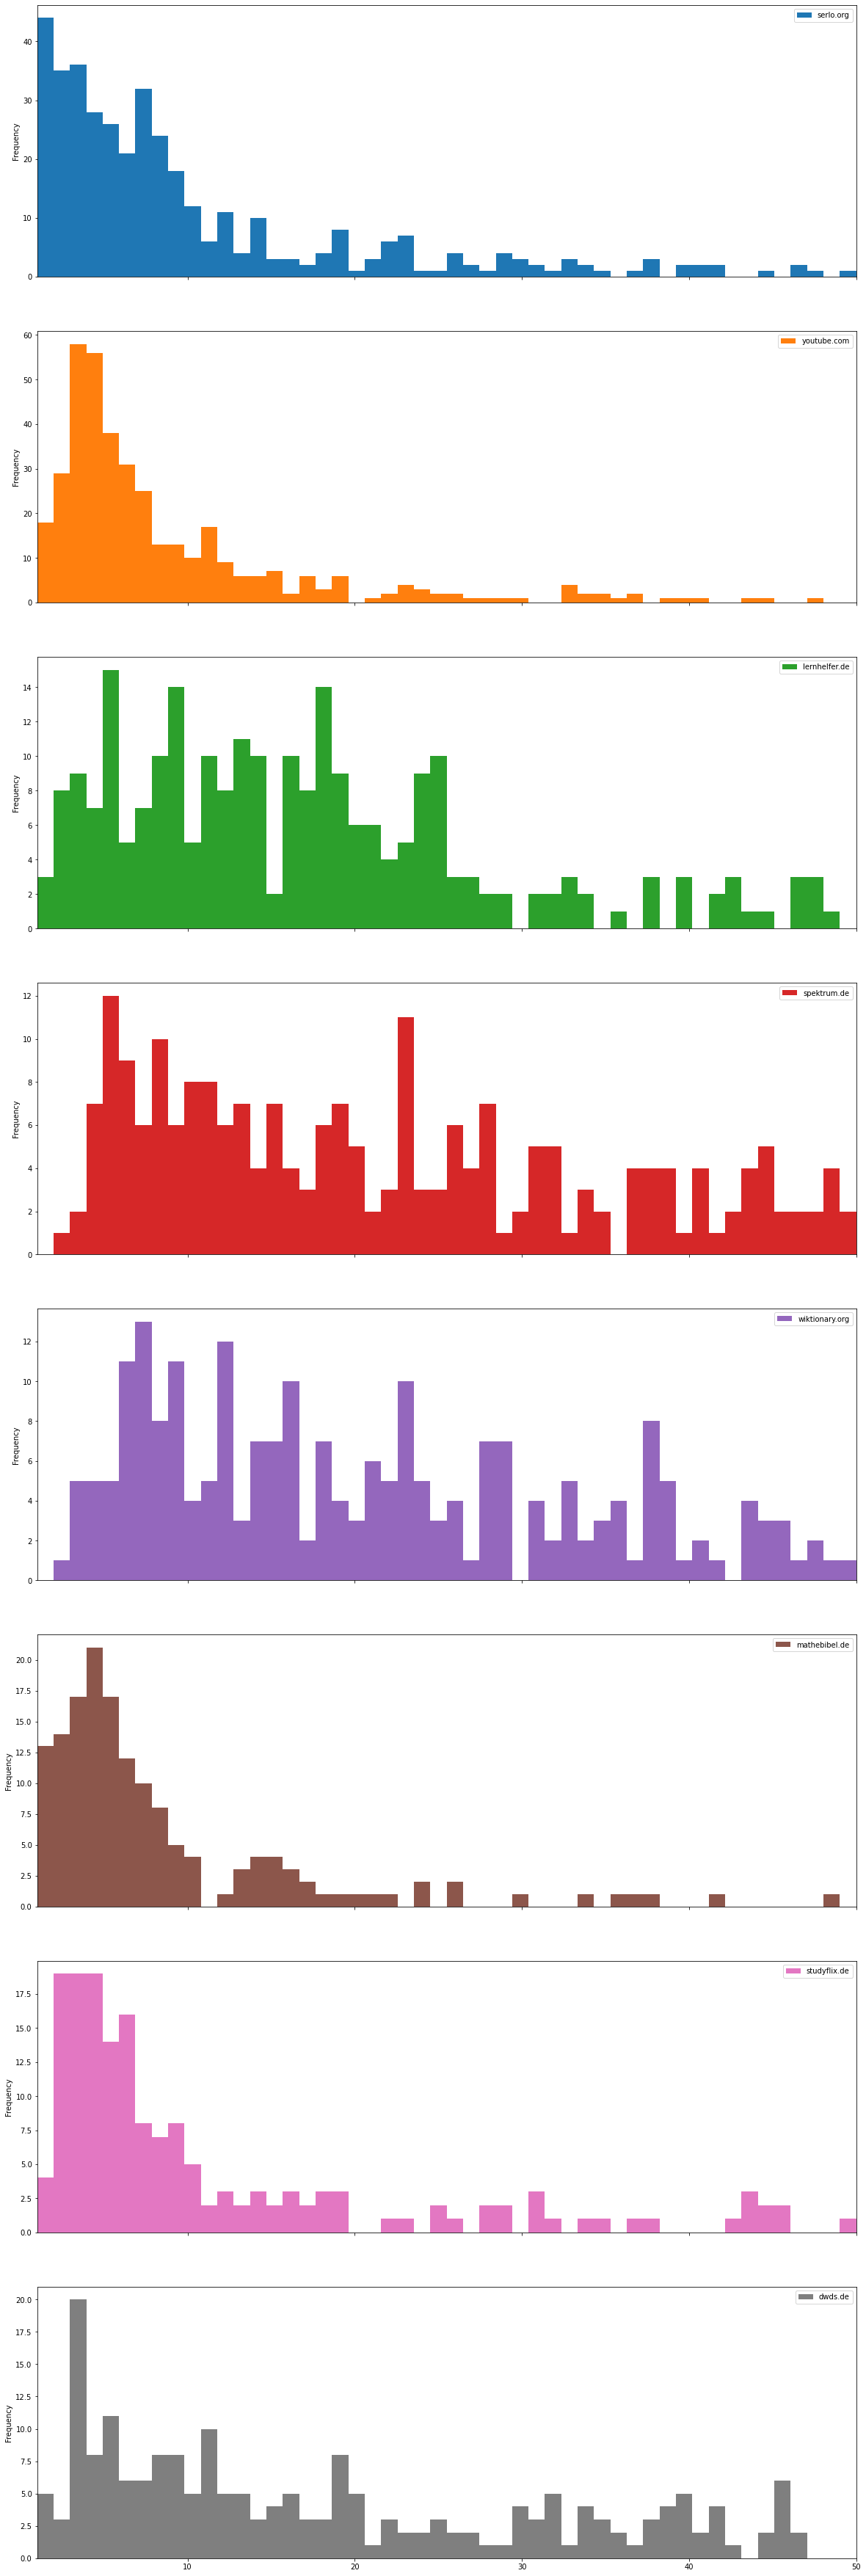

In [79]:
def get_distinct_values(prop):
    return set((entry[prop] for entry in all_keyword_entries))

for scope in get_distinct_values("scope"):
    analyse(query={"scope": scope}, blacklist=["wikipedia.org"], no_domains=7)

# Auswertung: Hochschulbereich Deutsch

## Auswertung (scope: hochschule, language: de)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* springer.com
* mathelounge.de
* matheplanet.com
* mathepedia.de
* massmatics.de
* ac.at

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,ac.at
keyword,,,,,,,,
geometrische summenformel,24.0,4.0,NaN,20.0,27.0,32.0,16.0,13.0
span,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beweis infimum,2.0,3.0,NaN,5.0,9.0,7.0,21.0,NaN
aussagen negieren,NaN,3.0,45.0,2.0,24.0,NaN,NaN,NaN
reelle zahlen,10.0,4.0,31.0,NaN,NaN,46.0,37.0,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,ac.at
count,156.000000,334.000000,273.000000,213.000000,173.000000,152.000000,132.000000,134.000000
mean,14.852564,6.068862,23.153846,21.558685,23.294798,17.921053,16.757576,25.962687
std,13.291183,5.943027,12.630719,11.875636,13.231386,13.831783,13.785223,13.230977
min,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
25%,4.000000,3.000000,13.000000,13.000000,11.000000,6.750000,5.000000,14.000000
50%,9.000000,4.000000,21.000000,20.000000,20.000000,11.500000,13.500000,27.000000
75%,23.000000,7.000000,33.000000,30.000000,35.000000,28.000000,26.000000,36.000000
max,47.000000,47.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000


### Historgramme

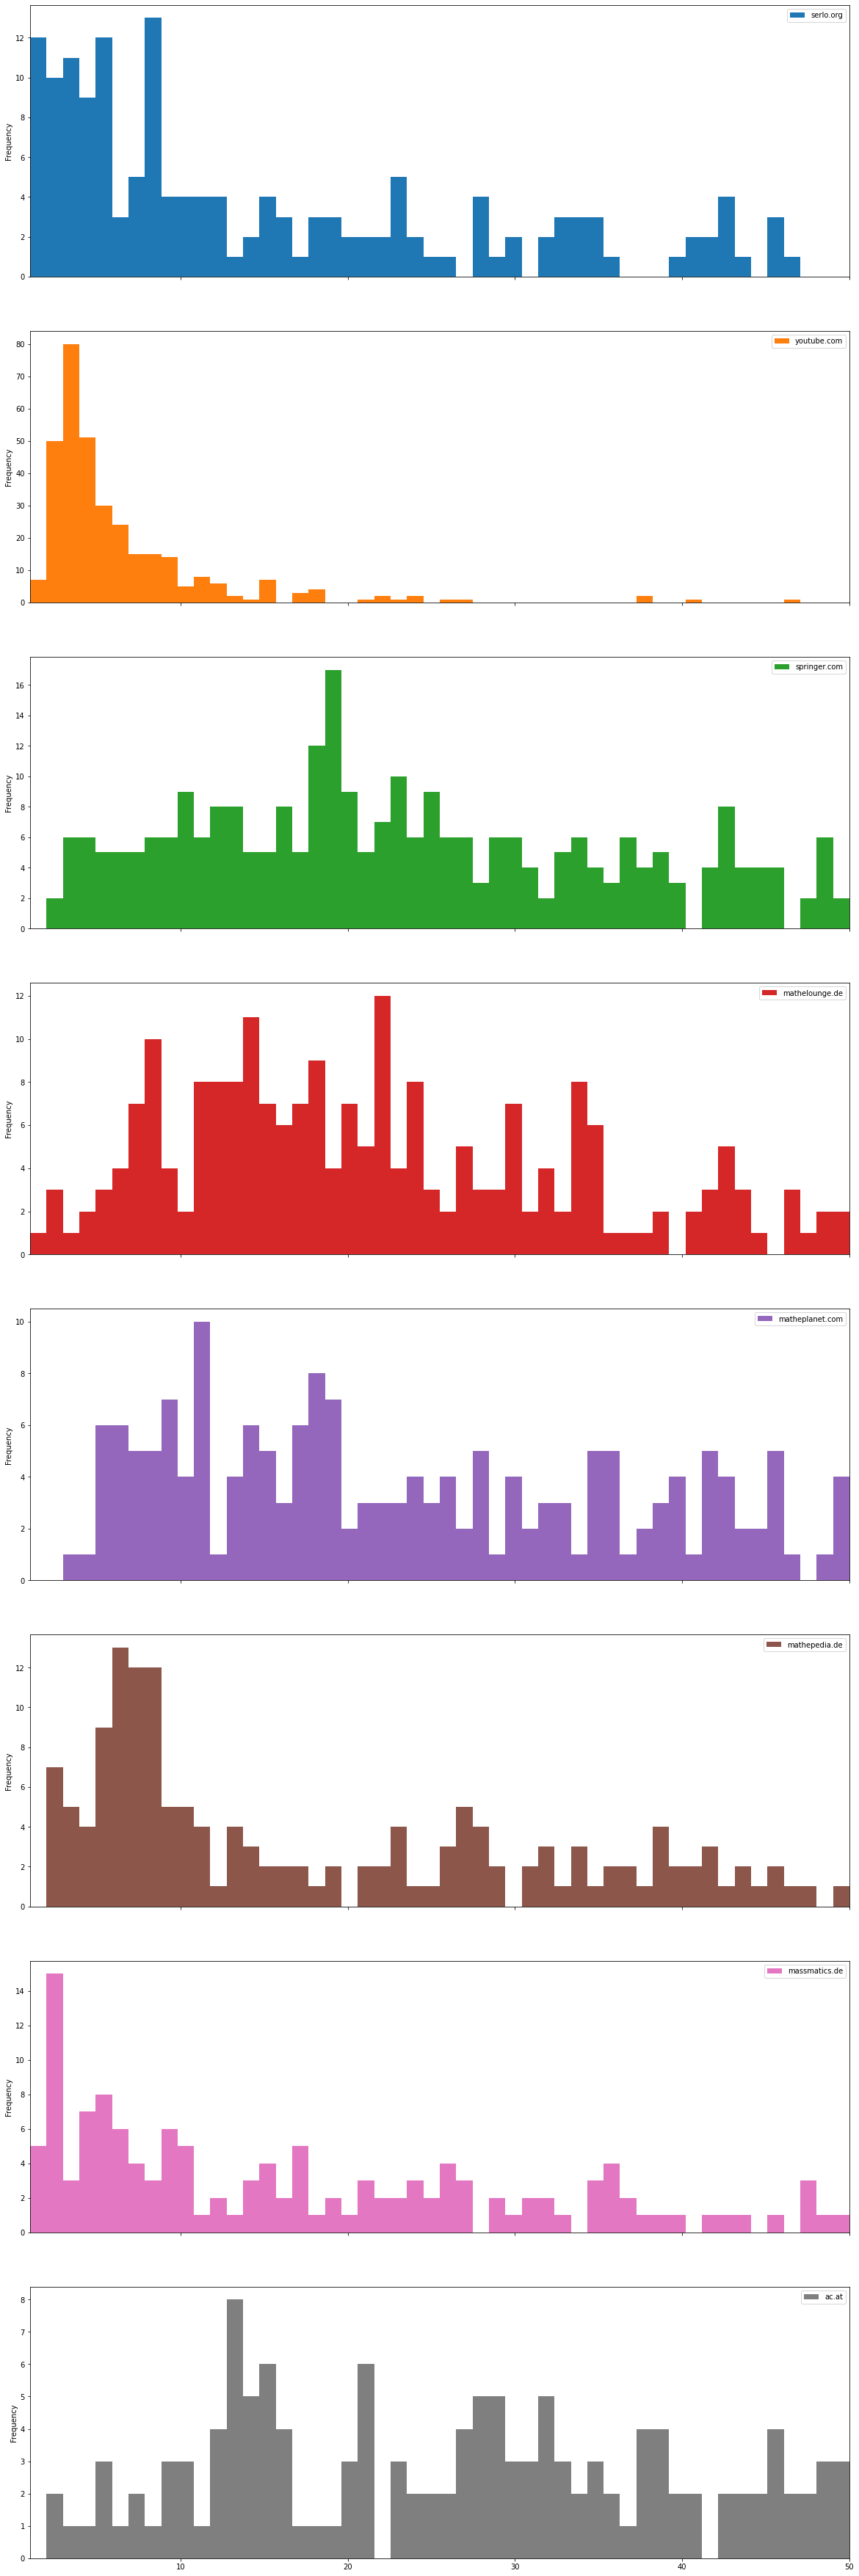

In [80]:
analyse(query={"scope": "hochschule", "language": "de"}, blacklist=["wikipedia.org"], no_domains=7)

# Auswertung: Schulmathematik

## Auswertung (scope: schule, subject: Mathe)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* mathebibel.de
* lernhelfer.de
* learnattack.de
* studienkreis.de
* matheretter.de
* sofatutor.com

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,mathebibel.de,lernhelfer.de,learnattack.de,studienkreis.de,matheretter.de,sofatutor.com
keyword,,,,,,,,
stochastik,9.0,2.0,6.0,NaN,11.0,NaN,NaN,16.0
bruchgleichung,8.0,1.0,4.0,19.0,24.0,11.0,32.0,36.0
kehrbruch,1.0,NaN,3.0,NaN,NaN,42.0,14.0,NaN
kongruenz,7.0,8.0,6.0,12.0,4.0,34.0,NaN,31.0
eckpunkt,8.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,mathebibel.de,lernhelfer.de,learnattack.de,studienkreis.de,matheretter.de,sofatutor.com
count,225.000000,205.000000,151.000000,141.000000,142.000000,116.000000,121.000000,136.000000
mean,6.475556,6.360976,8.238411,18.014184,18.971831,13.637931,17.495868,21.213235
std,6.879744,6.679383,8.680022,10.395731,11.427194,12.348840,9.911377,11.952008
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000
25%,2.000000,3.000000,3.000000,11.000000,10.000000,4.000000,9.000000,11.750000
50%,5.000000,4.000000,5.000000,17.000000,15.000000,10.000000,16.000000,18.000000
75%,7.000000,7.000000,9.000000,24.000000,27.750000,18.250000,25.000000,30.000000
max,50.000000,44.000000,49.000000,48.000000,47.000000,49.000000,49.000000,49.000000


### Historgramme

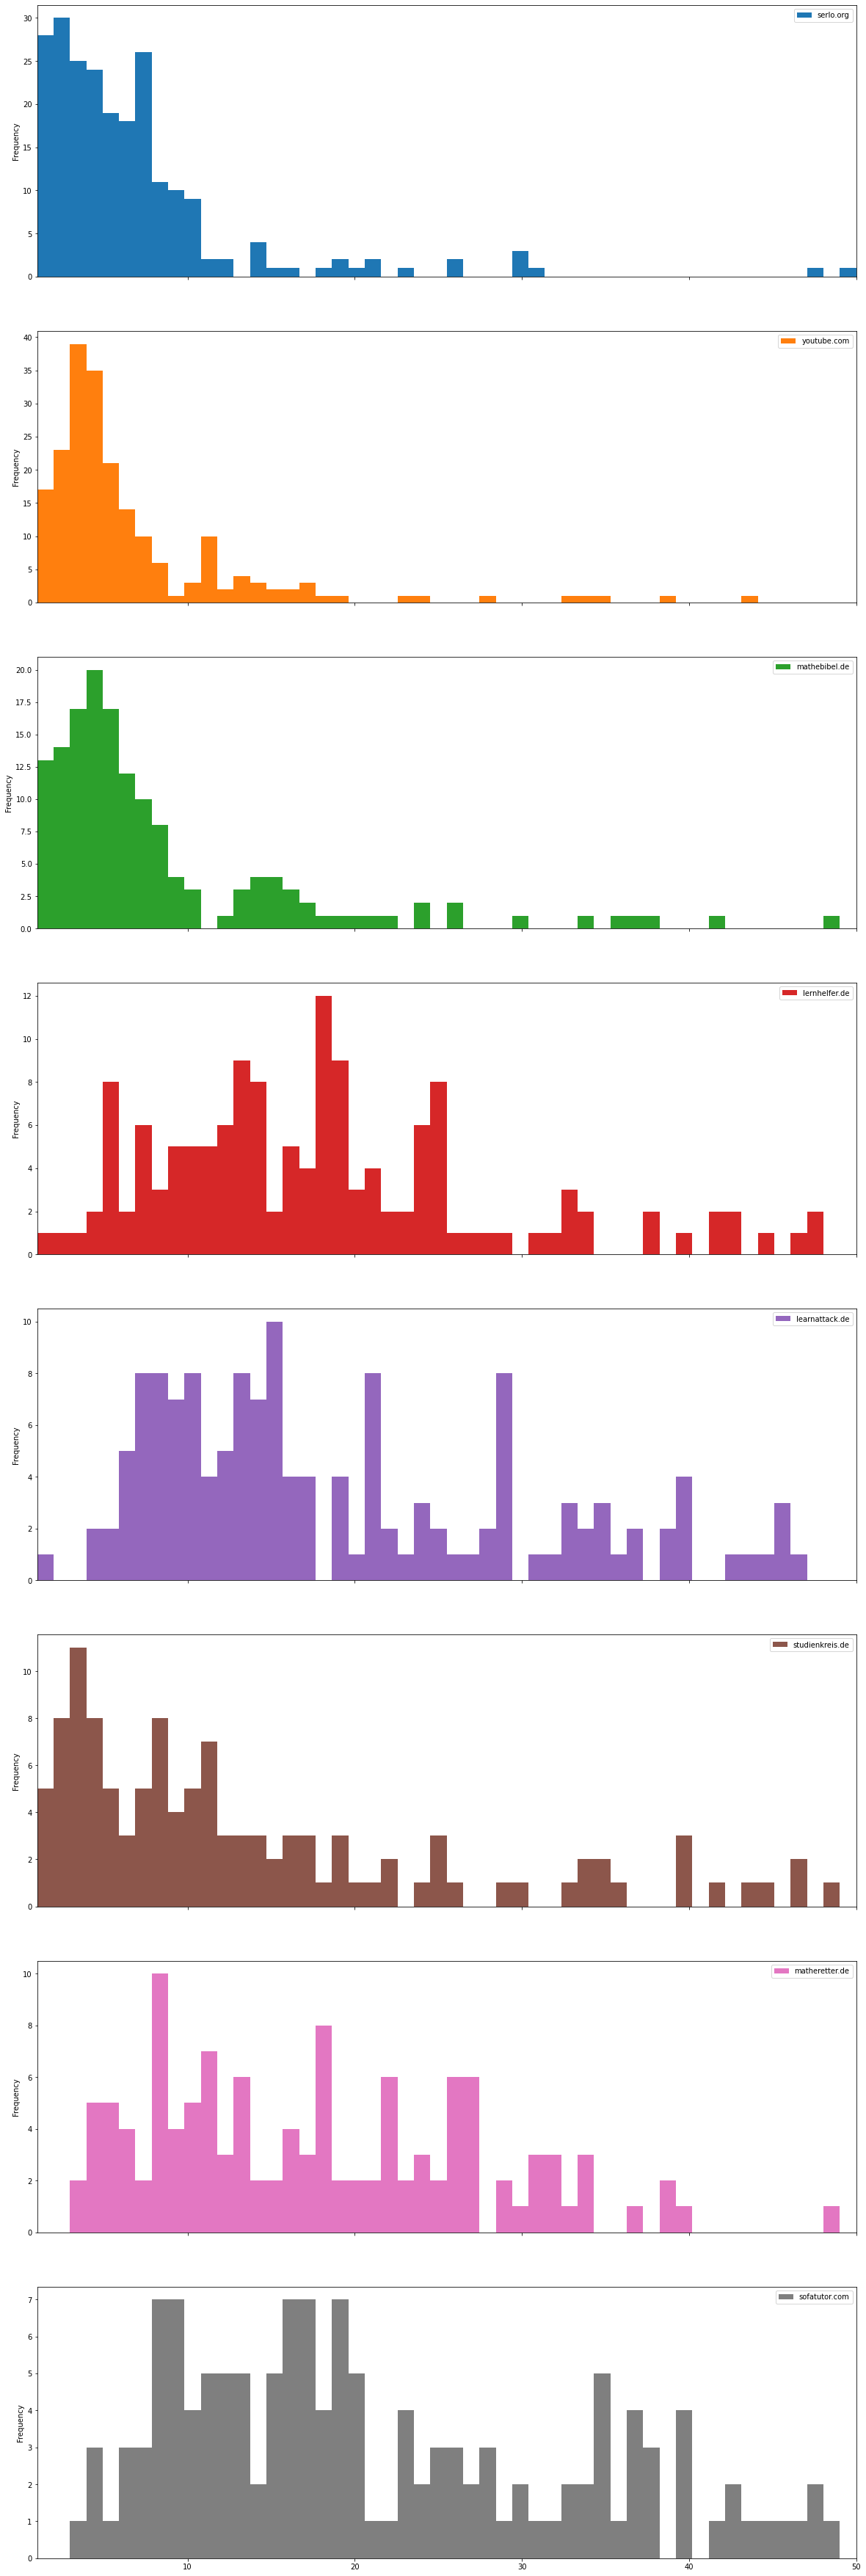

In [81]:
analyse(query={"scope": "schule", "subject": "Mathe"}, blacklist=["wikipedia.org"], no_domains=7)